# Breast Cancer Wisconsin (Diagnostic) Data Set - Analysis
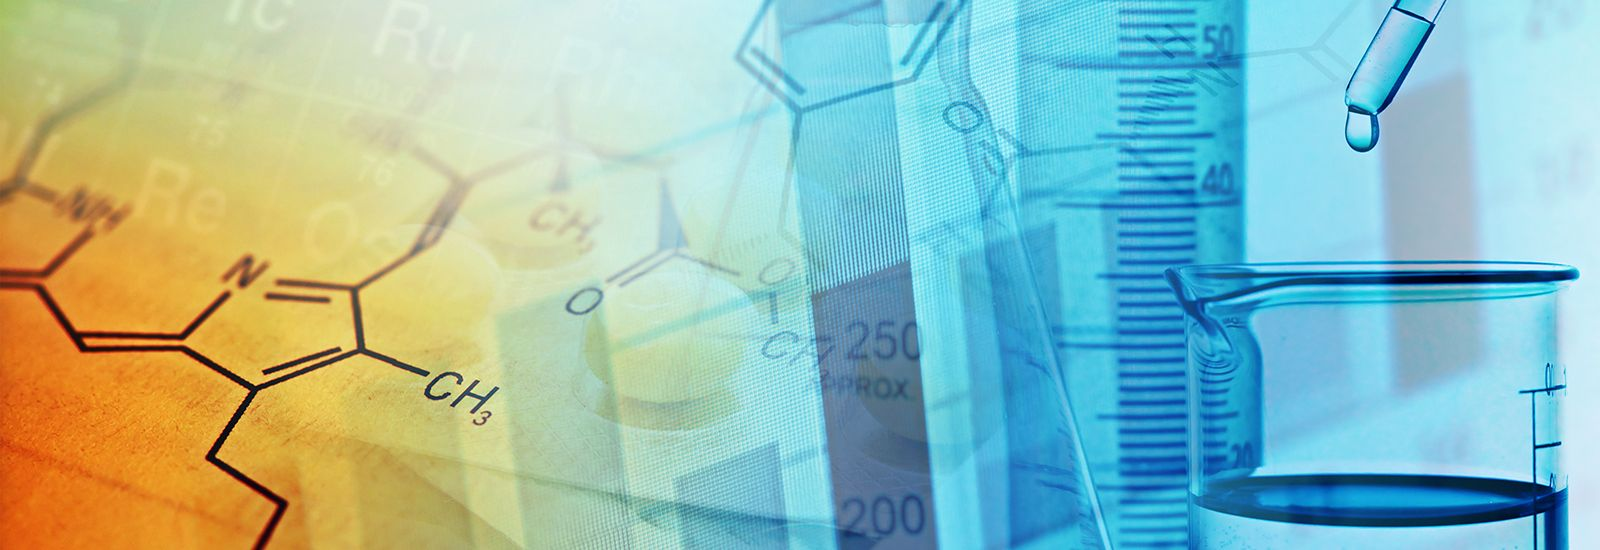
## Description of the issue
The analysis concerns the Breast Cancer Wisconsin Medical Diagnostic (Diagnostic) Data Set. Based on this set, classification rules will be constructed to best detect the presence of malignant tumor cells. Identification of relevant features, among others, in order to create a better diagnostic method. In the next part of the project, a cluster analysis will be carried out to group the objects due to the similarity present.

## Table of contents:
* [1. Descriptive analysis and visualization](#1)
    * [1.1 Data characteristics](#1.1)
    * [1.2 Data preparation and analysis of individual variables](#1.2)
    * [1.3 Analysis of relationships between variables](#1.3)
    * [1.4 Interpretation of results](#1.4)
* [2. Linear classification methods](#2)
    * [2.1 Linear regression](#2.1)
    * [2.2 Linear discriminant analysis (LDA)](#2.2)
    * [2.3 Quadratic discriminant analysis (QDA)](#2.3)
    * [2.4 Logistic regression](#2.4)
        * [2.4.1 Construction of model I for all variables](#2.4.1)
        * [2.4.2 Construction of model II for statistically significant characteristics](#2.4.2)
* [3. Results and conclusions](#3)
* [4. Cluster analysis - clustering methods](#4)
    * [4.1 K-means method](#4.1)
    * [4.2 PAM algorithm (Partitioning Around Medoids)](#4.2)
    * [4.3 CLARA method](#4.2)
* [5. Assessing the quality of clustering algorithms](#5)

## 1. Descriptive analysis and visualization <a class="anchor" id="1"></a>
The first stage of the project is descriptive analysis and data visualization, the goal of which is:
* Basic characterization of variables (e.g.: range of values, properties of distribution);
* Dependency (correlation) analysis of characteristics;
* Preliminary assessment of the ability of features to discriminate (separate) objects;
* Identification of missing and outlier (unusual) observations.

For this purpose, we will use methods such as summary indices (measures of position and spread, determined for all data and in groups/classes) and basic graphs (histograms, scatter plots, box-plots).

### 1.1 Data characteristics <a class="anchor" id="1.1"></a>

In [73]:
data <- read.csv(file="wdbc.data", stringsAsFactors = TRUE)
colnames(data) <- c("ID number","Diagnosis",
                    "radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean", "compactness_mean", "concavity_mean", 
                    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se","texture_se","perimeter_se","area_se",
                    "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se","radius_worst",
                    "texture_worst","perimeter_worst","area_worst","smoothness_worst", "compactness_worst", "concavity_worst", 
                    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst")
ncol <- ncol(data)
nrow <- nrow(data)
data <- data[,-1]
head(data)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


The Breast Cancer Wisconsin (Diagnostic) dataset consists of 568 observations and 32 variables. Before analyzing the data, we will introduce each variable in turn by giving its name, type and a brief description:
* ID number (int) - specifies the patient ID
* Diagnosis (factor, 2 levels) - determines the presence of benign or malignant cells
* tumor cells (M = malignant, B = benign)
Ten real-valued features are calculated for each cell nucleus:
* radius (numeric) - average distance from the center to points on the periphery
* texture (numeric) - standard deviation of gray-scale values
* parimeter (numeric)
* area (numeric)
* smoothness (numeric) - local variation of ray lengths
* compactness (numeric) - size given by the formula: perimeter2/area - 1
* concavity (numeric) - degree of concavity of a part of the contour
* concave points (numeric) - number of concave parts of the contour
* symmetry (numeric)
* fractal dimension (numeric) - the size given by the formula: "coastline approximation"-1

The mean, standard error and the "worst" or largest (average of the three largest values) of these features were calculated for each image. As a result, 30 features were obtained. All feature values are recoded with four significant digits. There are no missing values in the Breast Cancer Wisconsin (Diagnostic) data. We can observe that the variable ID number specifying the patient ID is not useful in the analysis, so we can remove it from the dataset. Figure 1 shows the basic information about the input data.

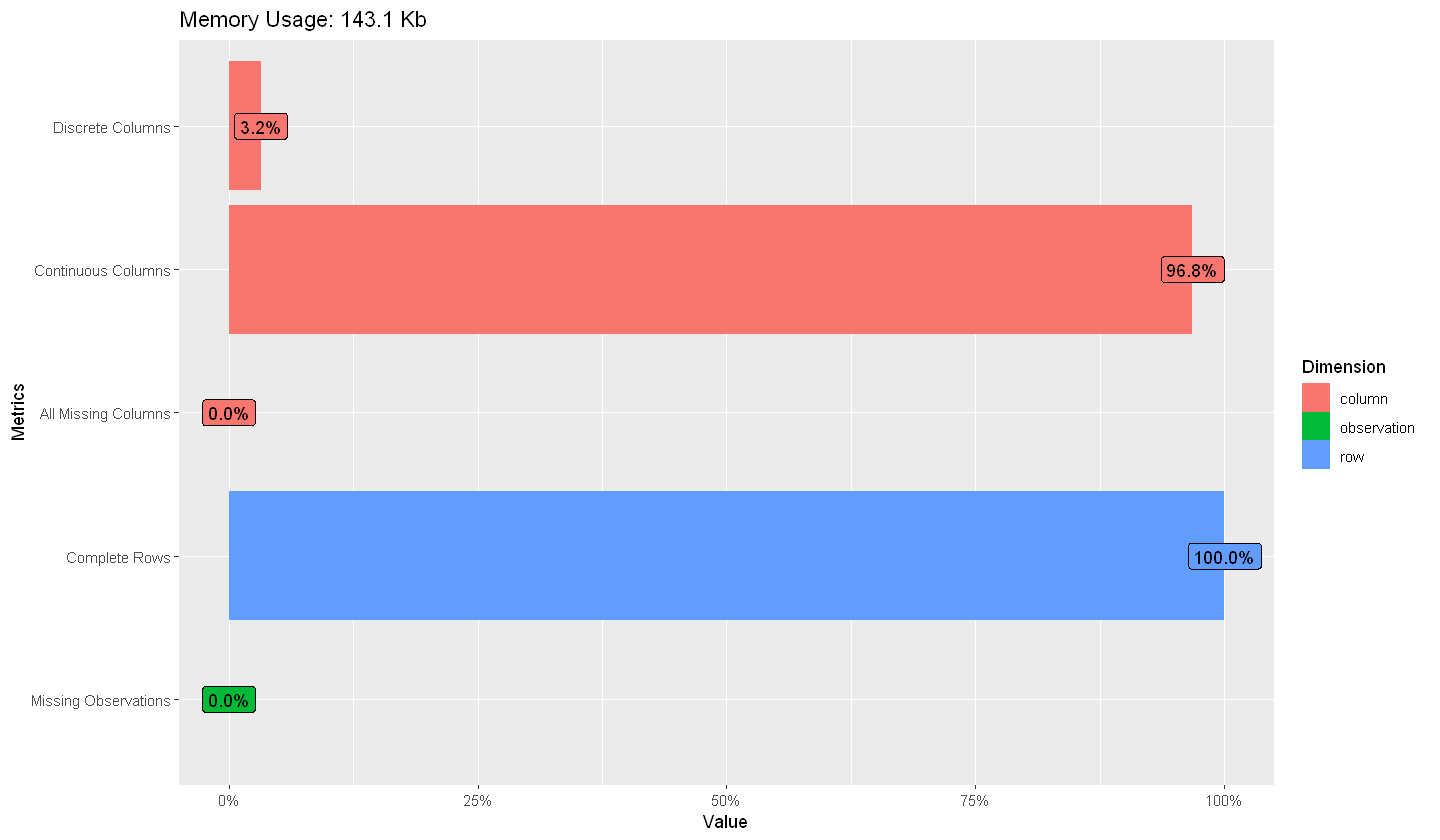

In [80]:
library(DataExplorer)
plot_intro(data, title=NULL)
options(repr.plot.width = 12, repr.plot.height = 6)

<div class="alert alert-block alert-info">
Comparing the incidence of benign and malignant tumor cells, we see that benign cases predominate in this data set. 357 observations, which account for 62.9% of all observations, indicate benign tumor cells, 211, which account for 37.1% of all observations, indicate the presence of a malignant tumor cell. 
</div>

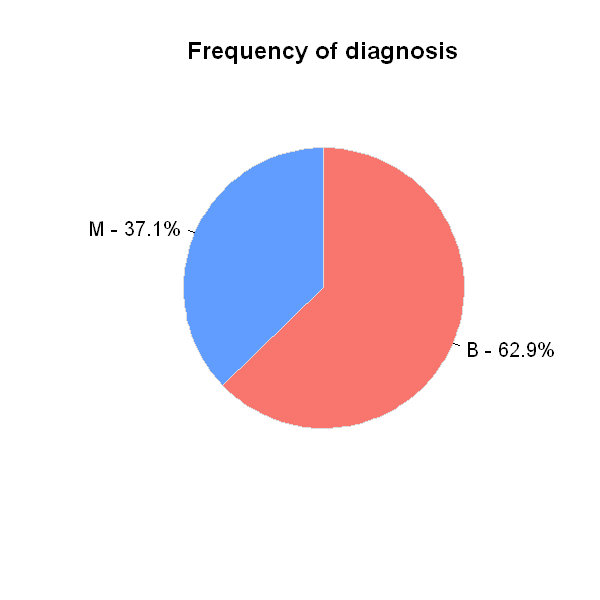

In [5]:
diagnosis <- table(data$Diagnosis)
diagnosis_prop.table <- prop.table(diagnosis)*100
diagnosis_prop.df <- as.data.frame(diagnosis_prop.table)
colors= c("#F8766D","#619CFF")
pie(diagnosis_prop.table, labels=sprintf("%s - %3.1f%s", diagnosis_prop.df[,1], diagnosis_prop.table, "%"), 
    clockwise=TRUE, border="gainsboro", radius=0.8, main="Frequency of diagnosis",col=colors) 
options(repr.plot.width = 5, repr.plot.height = 5)

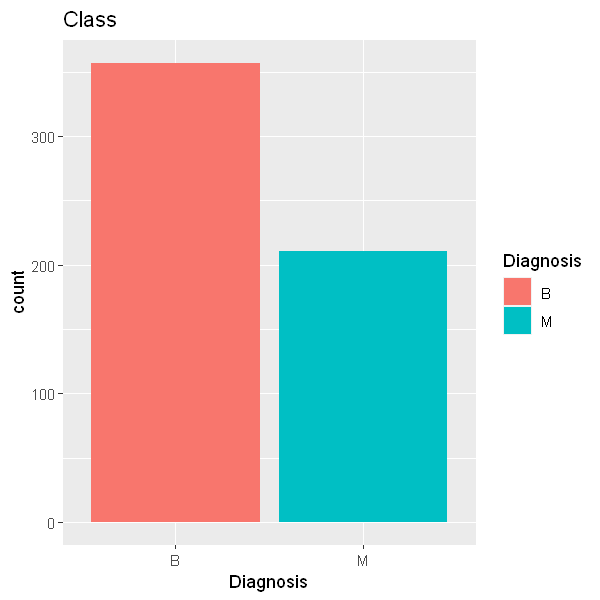

In [7]:
library(ggplot2)
ggplot(data)+geom_bar(aes(x=Diagnosis,fill = Diagnosis))+labs(title="Class")
options(repr.plot.width = 5, repr.plot.height = 5)

The table includes summary indicators (descriptive statistics) for the variables that were determined from all observations.

In [10]:
attach(data)
my.summary <- function(x)
{
  wskazniki <- c(mean=mean(x,na.rm=T), median=median(x,na.rm=T), min=min(x,na.rm=T), max=max(x,na.rm=T), 
                 sd=sd(x,na.rm=T), var=var(x,na.rm=T), IQR=IQR(x,na.rm=T))
  return(wskazniki)
}

sum_radius_mean <- my.summary(radius_mean)
sum_texture_mean <- my.summary(texture_mean)
sum_perimeter_mean <- my.summary(perimeter_mean)
sum_area_mean <- my.summary(area_mean)
sum_smoothness_mean <- my.summary(smoothness_mean)
sum_compactness_mean <- my.summary(compactness_mean)
sum_concavity_mean <- my.summary(concavity_mean)
sum_concave_points_mean <- my.summary(concave_points_mean)
sum_symmetry_mean <- my.summary(symmetry_mean)
sum_fractal_dimension_mean <- my.summary(fractal_dimension_mean)

sum_radius_se <- my.summary(radius_se)
sum_texture_se <- my.summary(texture_se)
sum_perimeter_se <- my.summary(perimeter_se)
sum_area_se <- my.summary(area_se)
sum_smoothness_se <- my.summary(smoothness_se)
sum_compactness_se <- my.summary(compactness_se)
sum_concavity_se <- my.summary(concavity_se)
sum_concave_points_se <- my.summary(concave_points_se)
sum_symmetry_se <- my.summary(symmetry_se)
sum_fractal_dimension_se <- my.summary(fractal_dimension_se)

sum_radius_worst <- my.summary(radius_worst)
sum_texture_worst <- my.summary(texture_worst)
sum_perimeter_worst <- my.summary(perimeter_worst)
sum_area_worst <- my.summary(area_worst)
sum_smoothness_worst <- my.summary(smoothness_worst)
sum_compactness_worst <- my.summary(compactness_worst)
sum_concavity_worst <- my.summary(concavity_worst)
sum_concave_points_worst <- my.summary(concave_points_worst)
sum_symmetry_worst <- my.summary(symmetry_worst)
sum_fractal_dimension_worst <- my.summary(fractal_dimension_worst)

df <- rbind(sum_radius_mean, sum_texture_mean, sum_perimeter_mean, 
            sum_area_mean, sum_smoothness_mean, sum_compactness_mean, 
            sum_concavity_mean, sum_concave_points_mean, sum_symmetry_mean, 
            sum_fractal_dimension_mean, sum_radius_se, sum_texture_se, 
            sum_perimeter_se, sum_area_se, sum_smoothness_se, sum_compactness_se, 
            sum_concavity_se, sum_concave_points_se, sum_symmetry_se, sum_fractal_dimension_se, 
            sum_radius_worst, sum_texture_worst, sum_perimeter_worst, sum_area_worst, 
            sum_smoothness_worst, sum_compactness_worst, sum_concavity_worst, sum_concave_points_worst, 
            sum_symmetry_worst, sum_fractal_dimension_worst)
rownames(df) <- c("radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
                  "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", 
                  "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", 
                  "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", 
                  "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", 
                  "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", 
                  "fractal_dimension_worst")
df

,mean,median,min,max,sd,var,IQR
radius_mean,1.412049e+01,1.3355e+01,6.981e+00,2.811e+01,3.523416e+00,1.241446e+01,4.08250e+00
texture_mean,1.930533e+01,1.8855e+01,9.710e+00,3.928e+01,4.288506e+00,1.839128e+01,5.62500e+00
perimeter_mean,9.191475e+01,8.6210e+01,4.379e+01,1.885e+02,2.428585e+01,5.898024e+02,2.87400e+01
area_mean,6.542798e+02,5.4875e+02,1.435e+02,2.501e+03,3.519238e+02,1.238503e+05,3.62450e+02
smoothness_mean,9.632148e-02,9.5865e-02,5.263e-02,1.634e-01,1.404601e-02,1.972903e-04,1.90100e-02
compactness_mean,1.040360e-01,9.2525e-02,1.938e-02,3.454e-01,5.235523e-02,2.741070e-03,6.55850e-02
concavity_mean,8.842731e-02,6.1400e-02,0.000e+00,4.268e-01,7.929422e-02,6.287574e-03,1.00110e-01
concave_points_mean,4.874629e-02,3.3455e-02,0.000e+00,2.012e-01,3.861717e-02,1.491285e-03,5.34200e-02
symmetry_mean,1.810549e-01,1.7920e-01,1.060e-01,3.040e-01,2.731942e-02,7.463505e-04,3.37250e-02
fractal_dimension_mean,6.276960e-02,6.1515e-02,4.996e-02,9.744e-02,7.034862e-03,4.948929e-05,8.42250e-03


<div class="alert alert-block alert-info">
We can observe that there are variables with very low variance in the data. Such variables are insignificant in the analysis, hence in the next steps we use a set devoid of variables with variance less than 0.0025. 
</div>

### 1.2 Data preparation and analysis of individual variables <a class="anchor" id="1.2"></a>

In [82]:
#removal of variables with too little variance
high_variance <- which(apply(data[,-1], 2, var) >= 0.0025)
high_variance_variable <- names(high_variance)
data_v2 <- data[,c("Diagnosis",high_variance_variable)]

Below are graphs of selected variables showing histograms, densities and quantile plots.

The following graphs show the distributions of variables that most resemble a normal distribution.

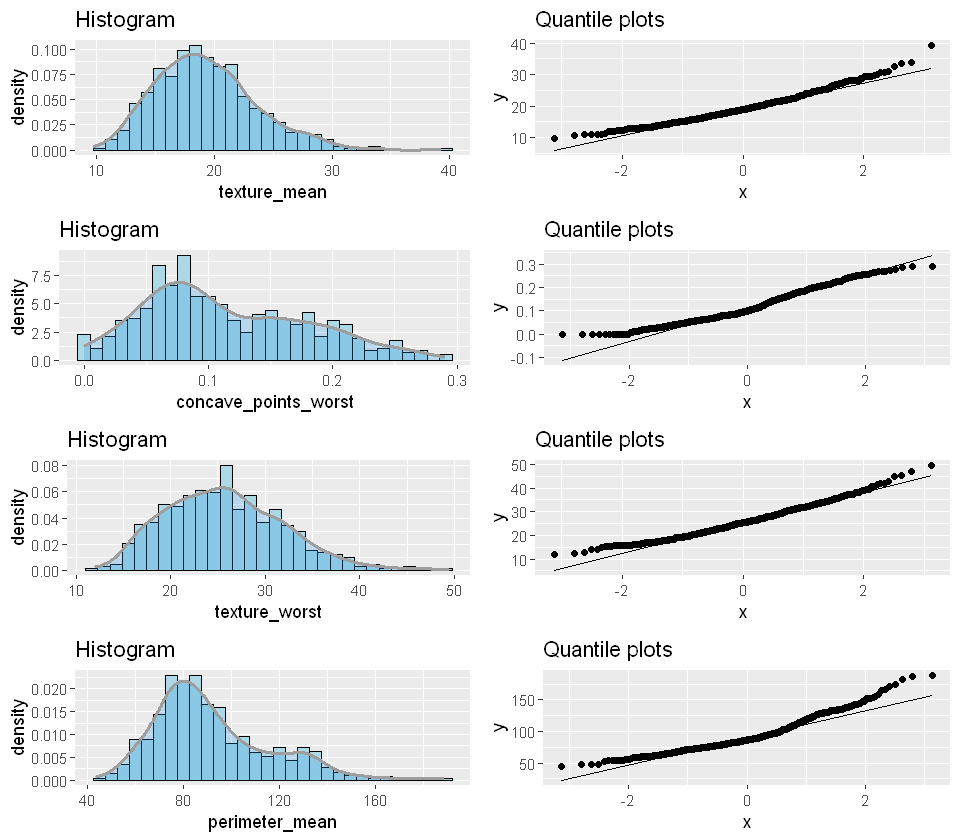

In [13]:
library(ggplot2)
p1 <- ggplot(data_v2, aes(x = texture_mean)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins=30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p11 <- ggplot(data_v2, aes(sample=texture_mean))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")


p2 <- ggplot(data_v2, aes(x = concave_points_worst)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins=30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p21 <- ggplot(data_v2, aes(sample=concave_points_worst))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")

p3 <- ggplot(data_v2, aes(x = texture_worst)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins=30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p31 <- ggplot(data_v2, aes(sample=texture_worst))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")


p4 <- ggplot(data_v2, aes(x = perimeter_mean)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins=30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p41 <- ggplot(data_v2, aes(sample=perimeter_mean))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")

library(gridExtra)
grid.arrange(p1,p11,p2,p21,p3,p31,p4,p41, ncol = 2, nrow = 4)
options(repr.plot.width = 8, repr.plot.height = 7)

Below are graphs of distributions of variables that less closely resemble a normal distribution.

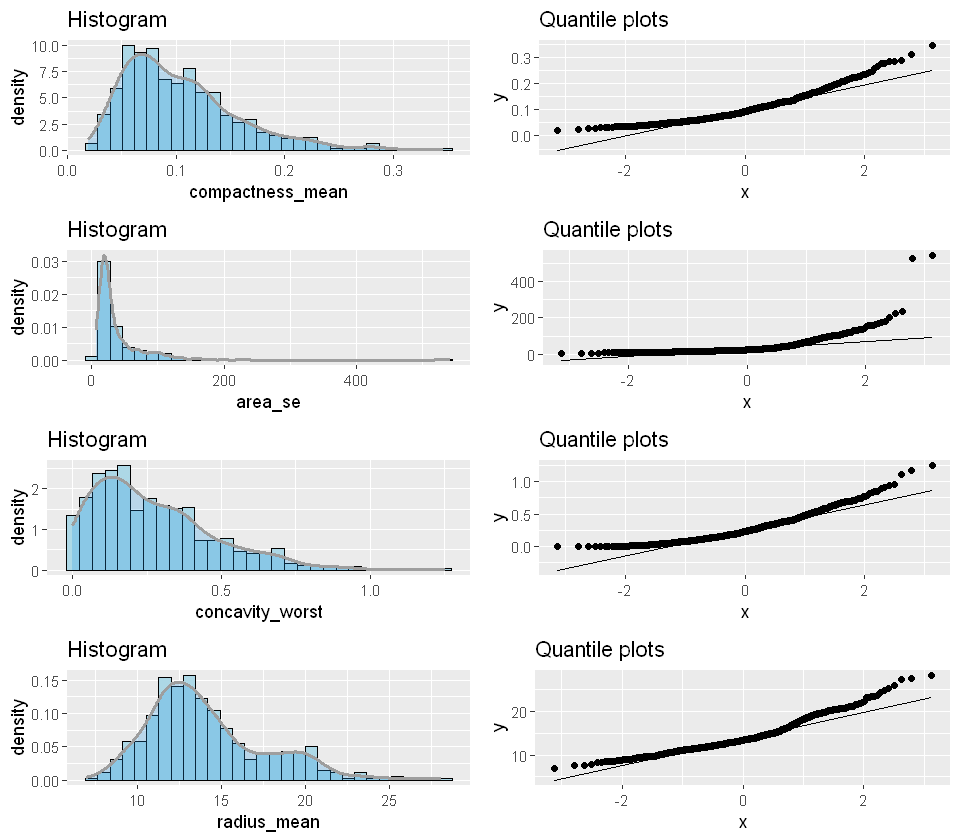

In [18]:
p5 <- ggplot(data_v2, aes(x = compactness_mean)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins=30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p51 <- ggplot(data_v2, aes(sample=compactness_mean))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")


p6 <- ggplot(data_v2, aes(x = area_se)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins=30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p61 <- ggplot(data_v2, aes(sample=area_se))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")

p7 <- ggplot(data_v2, aes(x = concavity_worst)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins=30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p71 <- ggplot(data_v2, aes(sample=concavity_worst))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")


p8 <- ggplot(data_v2, aes(x = radius_mean)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins=30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p81 <- ggplot(data_v2, aes(sample=radius_mean))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")

grid.arrange(p5,p51,p6,p61,p7,p71,p8,p81, ncol = 2, nrow = 4)
options(repr.plot.width = 8, repr.plot.height = 7)

We will check conformity to the normal distribution using the Shapiro-Wilk test at the $\alpha=0.05$ significance level.

In [16]:
statistic_W <- c() 
p_value <- c() 

for (i in 2:dim(data_v2)[2]){
  test <- shapiro.test(data_v2[,i]) 
  statistic_W <- append(statistic_W,test$statistic)  
  p_value <- append(p_value,test$p.value)
}

df2 <- cbind(statistic_W, p_value)
row.names(df2) <- names(data_v2[,-1])
colnames(df2) <- c("Statistic", "P-value")
df2

,Statistic,P-value
radius_mean,0.9404952,2.685924e-14
texture_mean,0.9757824,4.416635e-08
perimeter_mean,0.9356513,6.205282e-15
area_mean,0.8574635,2.861579e-22
compactness_mean,0.9189073,6.649171e-17
concavity_mean,0.8669365,1.424482e-21
radius_se,0.7441644,1.114416e-28
texture_se,0.8964573,3.940089e-19
perimeter_se,0.7167590,6.982586e-30
area_se,0.5608476,2.296039e-35


<div class="alert alert-block alert-info">
The P-value for all variables is less than the $0.05$ istability level, so we reject the null hypothesis that the data distribution is normal. To improve the distribution of the variables to normal and reduce outlier observations, we will use BoxCox transofmation.
</div>

In [17]:
library(MASS)
data_v3 <- data.frame("Diagnosis" = data_v2$Diagnosis)

for (i in 2:(dim(data_v2)[2])){
  d <- data_v2[,i] 
  bc <- boxcox(d+1 ~ 1,plotit = F)
  lambda <- bc$x[which.max(bc$y)]
  transformed_data <- (((d+1)^lambda)-1)/lambda
  data_v3 <- cbind(data_v3,transformed_data)
}
names(data_v3) <- names(data_v2)

The following graphs show the distributions of the variables after applying the transformation.

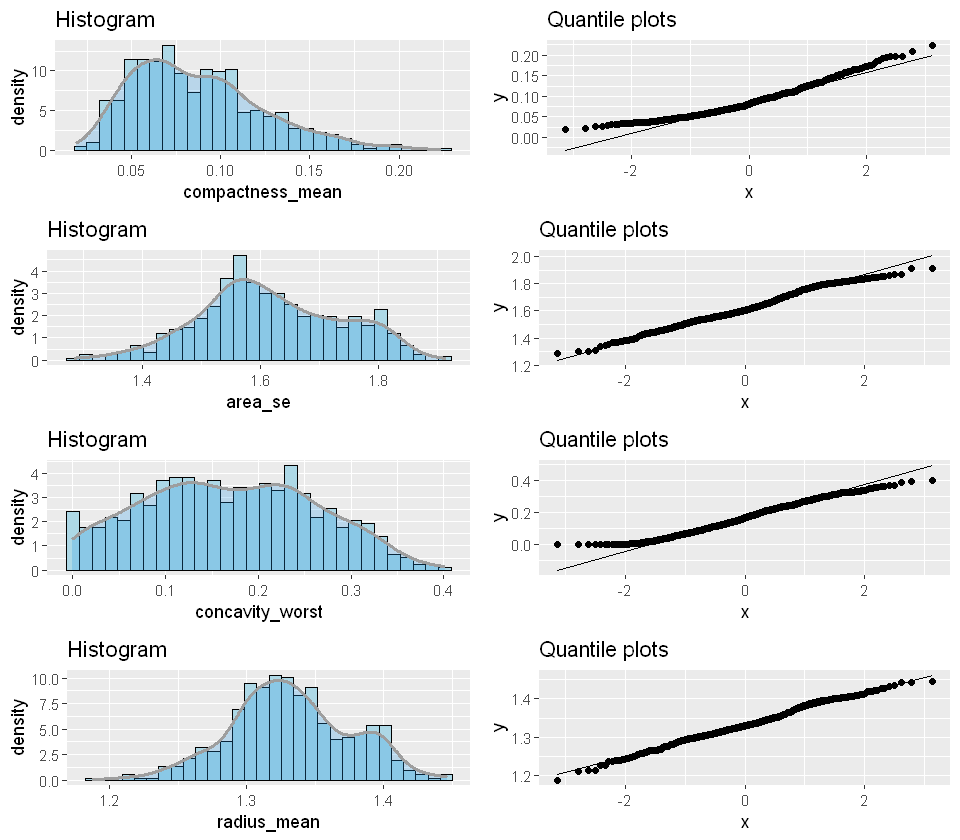

In [20]:
p9 <- ggplot(data_v3, aes(x = compactness_mean)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins = 30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p91 <- ggplot(data_v3, aes(sample=compactness_mean))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")


p10 <- ggplot(data_v3, aes(x = area_se)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins = 30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p101 <- ggplot(data_v3, aes(sample=area_se))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")

p11 <- ggplot(data_v3, aes(x = concavity_worst)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins = 30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p111 <- ggplot(data_v3, aes(sample=concavity_worst))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")


p12 <- ggplot(data_v3, aes(x = radius_mean)) + 
  geom_histogram(aes(y = ..density..),
                 colour = 1, fill = "lightblue",bins = 30) +
  geom_density(lwd = 1, colour = 8,
               fill = 4, alpha = 0.25) + labs(title = "Histogram")
p121 <- ggplot(data_v3, aes(sample=radius_mean))+stat_qq() +stat_qq_line() + labs(title = "Quantile plots")


grid.arrange(p9,p91,p10,p101,p11,p111,p12,p121, ncol = 2, nrow = 4)
options(repr.plot.width = 8, repr.plot.height = 7)

### 1.3 Analysis of relationships between variables <a class="anchor" id="1.3"></a>

We check, using box plots by class, the outliers and where the median of the selected variables for each class lies. 

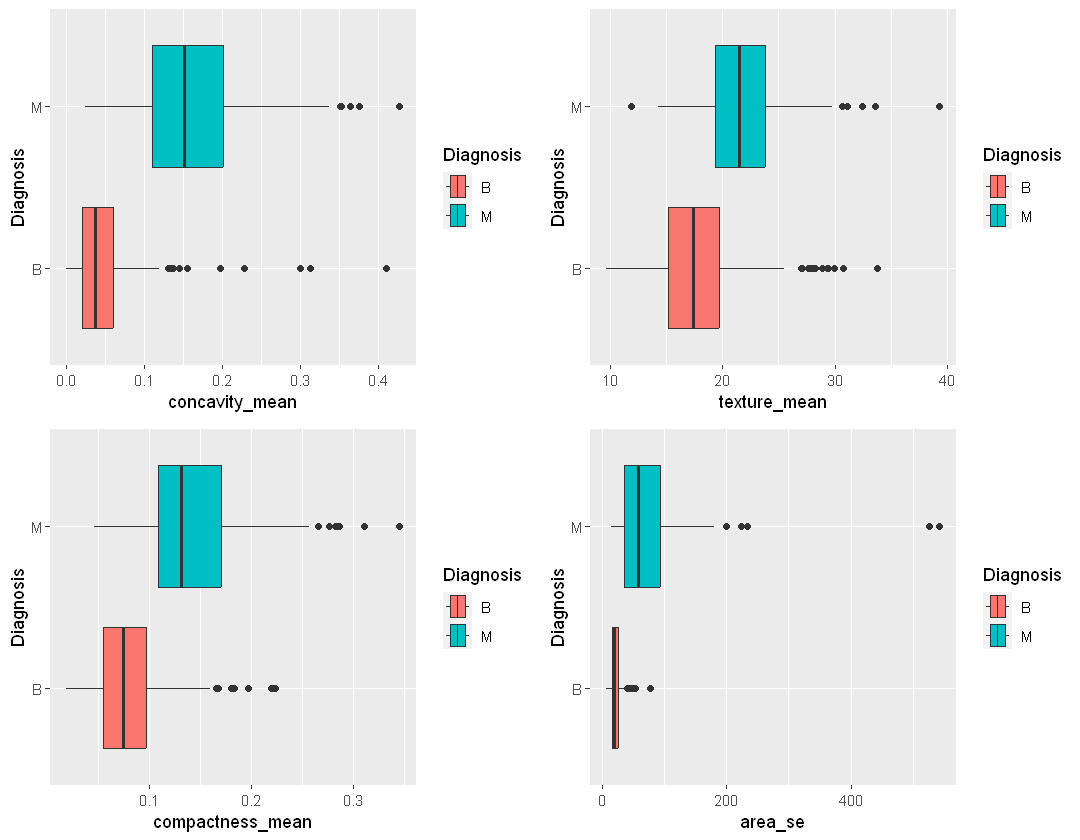

In [85]:
box1 <- ggplot(data_v2, aes(x=concavity_mean, y=Diagnosis)) + 
  geom_boxplot(aes(fill = Diagnosis))

box2 <- ggplot(data_v2, aes(x=texture_mean, y=Diagnosis)) + 
  geom_boxplot(aes(fill = Diagnosis))

box3 <- ggplot(data_v2, aes(x=compactness_mean, y=Diagnosis)) + 
  geom_boxplot(aes(fill = Diagnosis))

box4 <- ggplot(data_v2, aes(x=area_se, y=Diagnosis)) + 
  geom_boxplot(aes(fill = Diagnosis))

grid.arrange(box1,box2,box3,box4, ncol = 2, nrow = 2)
options(repr.plot.width = 10, repr.plot.height = 7)

<div class="alert alert-block alert-info">
There are outlier observations in each of the variables, the medians for the selected variables in the classes are not significantly far from each other.
</div>

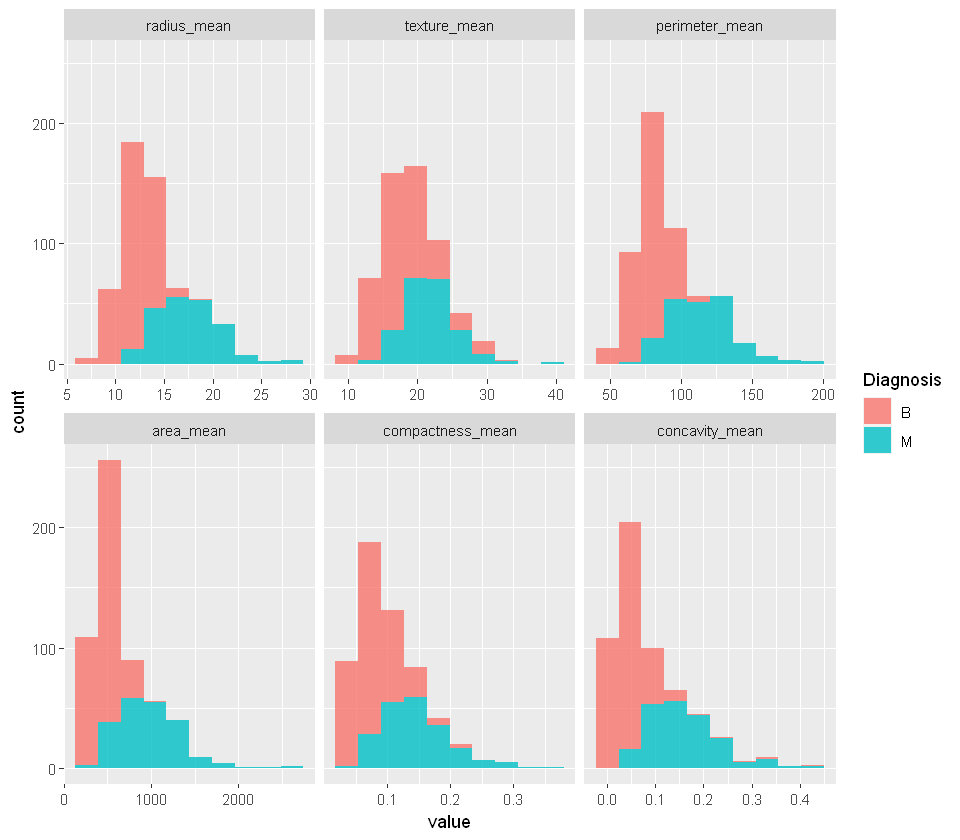

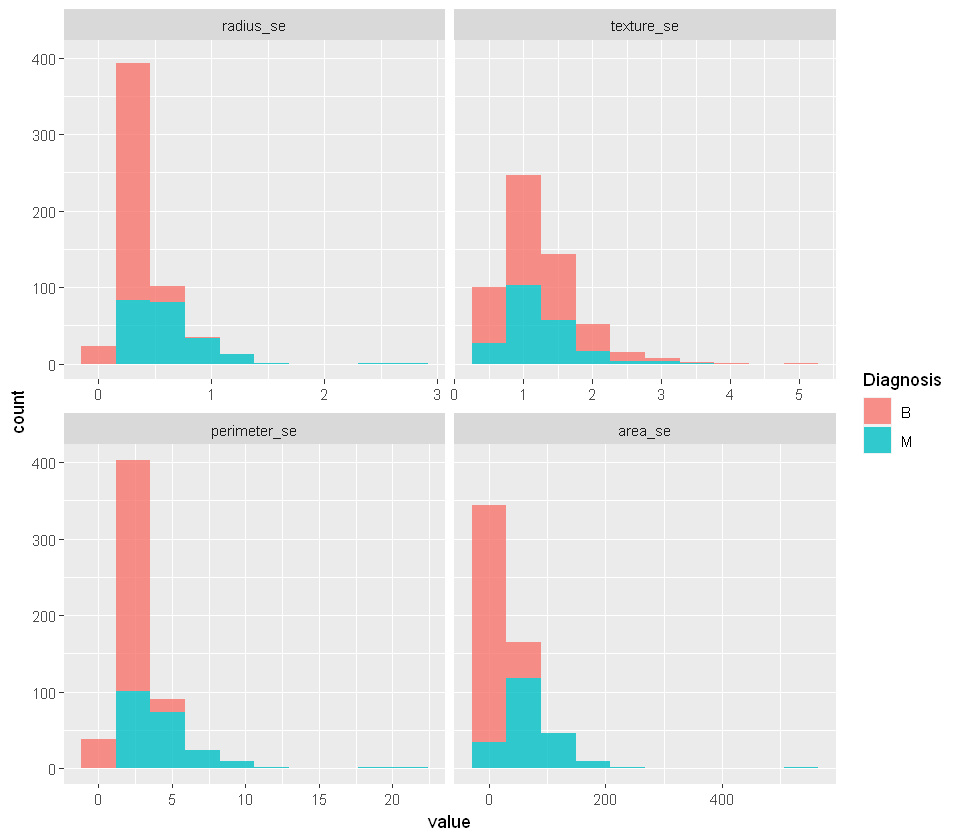

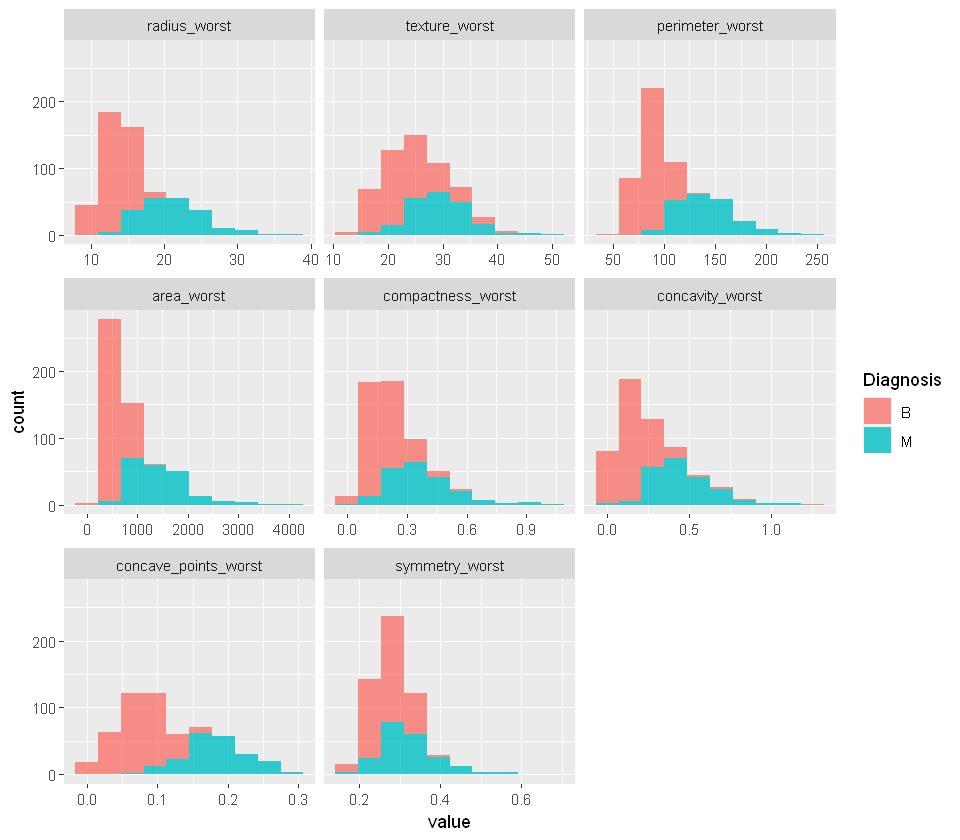

In [22]:
data_mean <- data_v2[ ,c("Diagnosis","radius_mean", "texture_mean",
                         "perimeter_mean", "area_mean", "compactness_mean", 
                         "concavity_mean")]
data_se <- data_v2[ ,c("Diagnosis","radius_se", "texture_se","perimeter_se", 
                       "area_se")]
data_worst <- data_v2[ ,c("Diagnosis","radius_worst", "texture_worst",
                          "perimeter_worst","area_worst","compactness_worst",
                          "concavity_worst","concave_points_worst",
                          "symmetry_worst")]
library(reshape2)
par(mfrow=c(3,1))
ggplot(data = melt(data_mean, id.var = "Diagnosis"), mapping = aes(x = value)) + 
  geom_histogram(bins = 10, aes(fill=Diagnosis), alpha=0.8) + 
facet_wrap(~variable, scales = 'free_x')

ggplot(data = melt(data_se, id.var = "Diagnosis"), mapping = aes(x = value)) + 
geom_histogram(bins = 10, aes(fill=Diagnosis), alpha=0.8) + 
facet_wrap(~variable, scales = 'free_x')

ggplot(data = melt(data_worst, id.var = "Diagnosis"), mapping = aes(x = value)) + 
geom_histogram(bins = 10, aes(fill=Diagnosis), alpha=0.8) + 
facet_wrap(~variable, scales = 'free_x')

<div class="alert alert-block alert-info">
From the above histograms, we observe that the distribution of each variable in classes B and M is converged to a normal distribution. 
</div>

In this part of the project, we will discuss the relationships (correlations) between variables. To see the two-dimensional relationships between variables, we will look at their correlation coefficients.

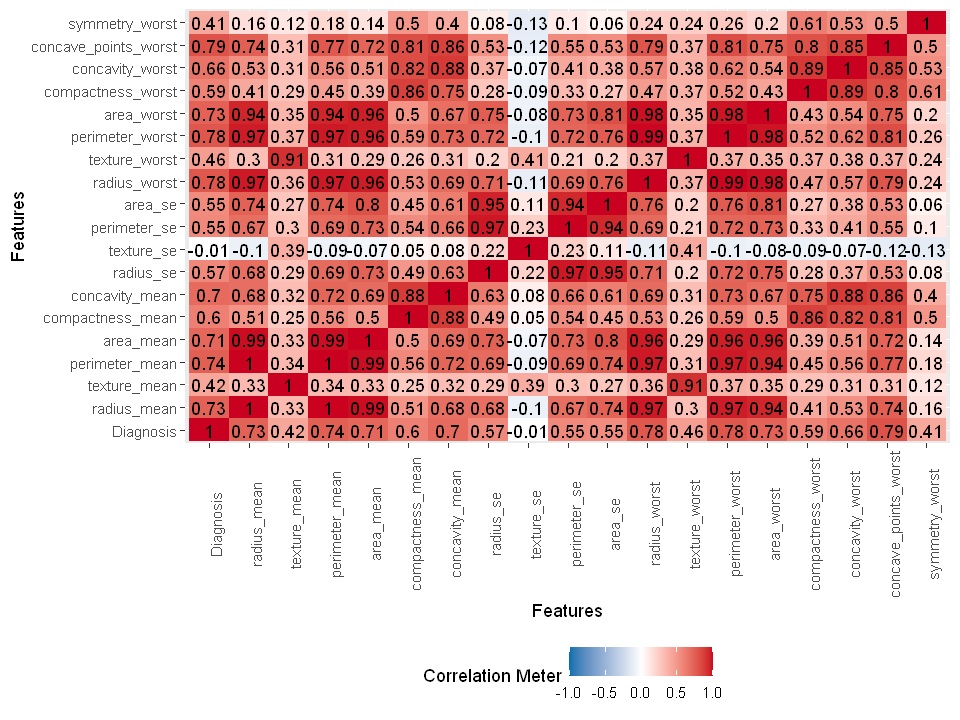

In [28]:
library(DataExplorer)
data_v2$Diagnosis <- ifelse(data_v2$Diagnosis == "B",0,1)
plot_correlation(data_v2,type = "continuous")
options(repr.plot.width = 8, repr.plot.height = 6)

<div class="alert alert-block alert-info">
We observe that the correlation coefficient of the texture se variable and Diagnosis is very small, so we remove this variable. We also remove one of the two explanatory variables whose correlation coefficient was higher than 0.9.
    </div>

In [33]:
data_v4 <- data_v2[,-c(9,5,10,11,12,13,14,15)]
head(data_v4)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,compactness_mean,concavity_mean,radius_se,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,20.57,17.77,132.90,0.07864,0.0869,0.5435,0.1866,0.2416,0.1860,0.2750
2,1,19.69,21.25,130.00,0.15990,0.1974,0.7456,0.4245,0.4504,0.2430,0.3613
3,1,11.42,20.38,77.58,0.28390,0.2414,0.4956,0.8663,0.6869,0.2575,0.6638
4,1,20.29,14.34,135.10,0.13280,0.1980,0.7572,0.2050,0.4000,0.1625,0.2364
5,1,12.45,15.70,82.57,0.17000,0.1578,0.3345,0.5249,0.5355,0.1741,0.3985
6,1,18.25,19.98,119.60,0.10900,0.1127,0.4467,0.2576,0.3784,0.1932,0.3063


Class discriminations for individual Breast Cancer Wisconsin data variables:

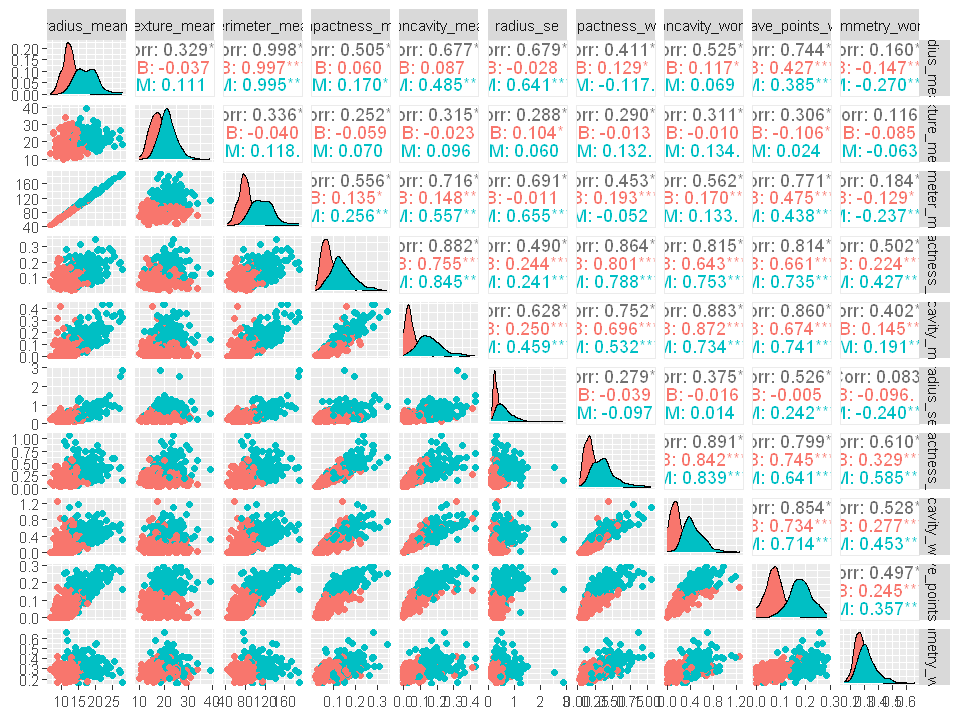

In [34]:
library(GGally)
library(ggplot2)
data_v4$Diagnosis <- ifelse(data_v4$Diagnosis == 0,"B","M")
ggpairs(data_v4, columns = 2:11, ggplot2::aes(color = Diagnosis))

Below are scatter diagrams of the traits with the best discriminatory abilities.

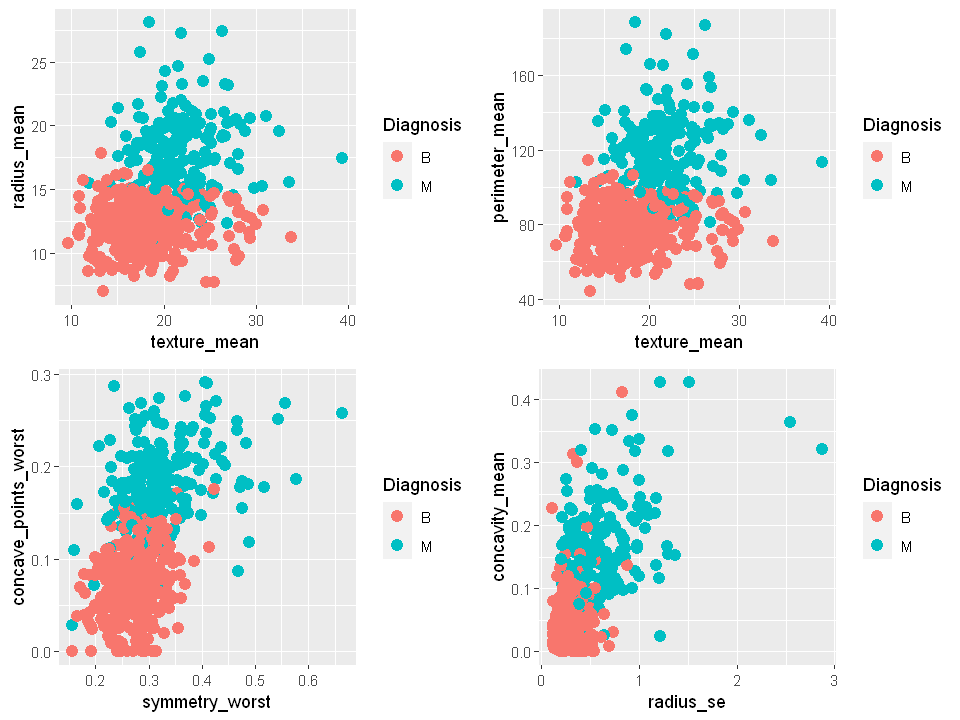

In [36]:
p1 <- ggplot(data_v4, aes(x=texture_mean, y=radius_mean, color=Diagnosis)) + 
    geom_point(size=3)
p2 <- ggplot(data_v4, aes(x=texture_mean, y=perimeter_mean, color=Diagnosis)) + 
    geom_point(size=3)
p3 <- ggplot(data_v4, aes(x=symmetry_worst, y=concave_points_worst, color=Diagnosis)) + 
    geom_point(size=3)
p4 <- ggplot(data_v4, aes(x=radius_se, y=concavity_mean, color=Diagnosis)) + 
    geom_point(size=3)
grid.arrange(p1,p2,p3,p4, ncol=2)
options(repr.plot.width = 8)

<div class="alert alert-block alert-info">
Final data - after transformation and discarding correlations of correlated and uncorrelated variables with the diagnosis variable.
</div>

In [37]:
data_v5 <- data_v3[,-c(9,5,10,11,12,13,14,15)]
head(data_v5)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,compactness_mean,concavity_mean,radius_se,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,1.402706,2.541464,1.827162,0.07024894,0.07675598,0.2901269,0.1448913,0.1756555,0.1445319,0.1924260
2,M,1.396026,2.667248,1.825259,0.12835448,0.15126824,0.3359106,0.2535975,0.2623190,0.1763857,0.2301873
3,M,1.299066,2.637942,1.774382,0.19667542,0.17555094,0.2764683,0.3564487,0.3242921,0.1838057,0.3193792
4,M,1.400629,2.389425,1.828564,0.11036001,0.15161747,0.3380699,0.1556533,0.2448980,0.1300150,0.1729215
5,M,1.316225,2.453799,1.781221,0.13474322,0.12700508,0.2192415,0.2849758,0.2879343,0.1372898,0.2443504
6,M,1.384055,2.624025,1.817881,0.09345660,0.09615582,0.2611017,0.1838560,0.2368402,0.1488089,0.2069888


### 1.4 Interpretation of results <a class="anchor" id="1.3"></a>

* 13 variables have variances less than 0.0025;
* Variables with variances greater than 0.0025 do not have a normal distribution (Shapiro-Wilk test);
* There are outlier observations in each variable;
* The final data include 10 explanatory variables: radius mean, texture mean, perimeter mean, compactness mean, concavity mean, radius se, compactness worst, concavity worst, concave points worst, symmetry worst.

## 2. Linear classification methods <a class="anchor" id="2"></a>

### 2.1 Linear regression <a class="anchor" id="2.1"></a>
Our goal is to classify the cell nuclei by fitting 2 regression models (lm function). Tumor cells are ordered by their membership in the benign (B) or malignant (M) tumor cell class.

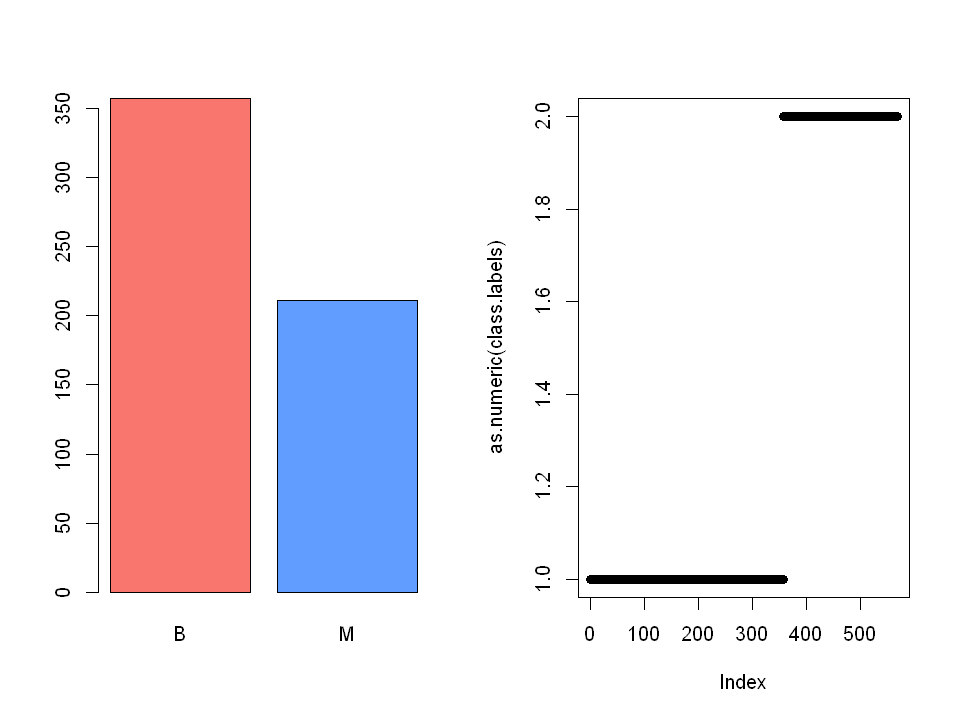

In [39]:
data_v5_rl <- data_v5[
  order(data_v5[,1] ),]
class.labels <-  data_v5_rl$Diagnosis
n <- length(class.labels)
K <- length(levels(as.factor(class.labels)))
par(mfrow=c(1,2))
plot(class.labels, col=c("#F8766D","#619CFF"))
plot(as.numeric(class.labels)) 

Graphical presentation of results:

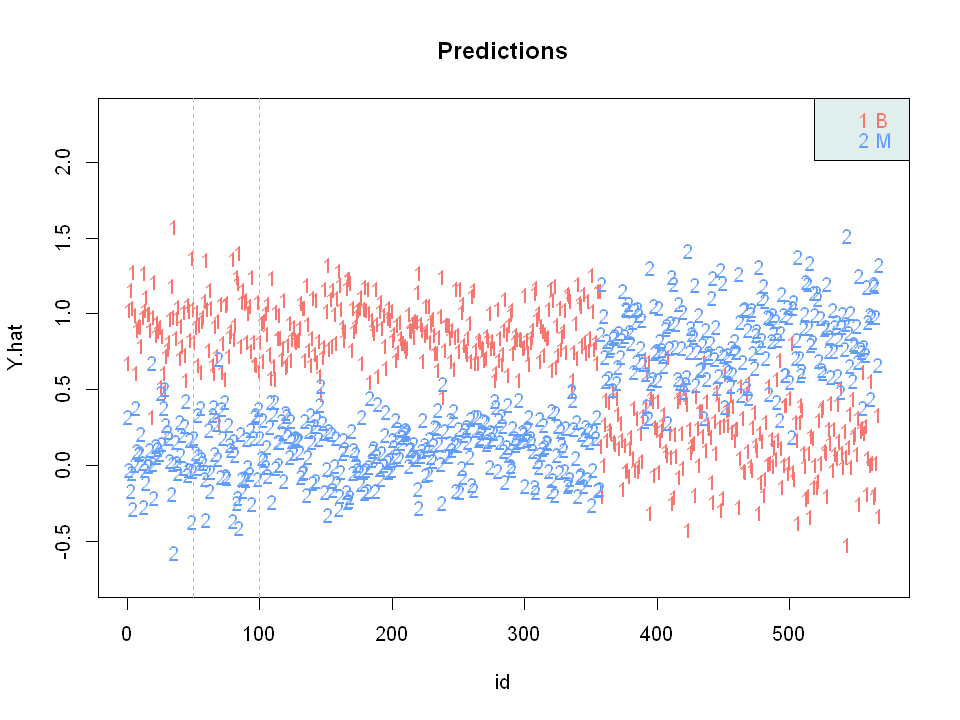

In [41]:
Y1 <- c(rep(1,357),rep(0,211))#B
Y2 <- c(rep(0,357),rep(1,211)) #M
data1 = cbind(data_v5_rl[,2:11],Y1)
data2 = cbind(data_v5_rl[,2:11],Y2)
data1.lm <- lm(Y1~., data=data1)
data2.lm <- lm(Y2~., data=data2)
pred1.lm  <- predict(data1.lm, data1)
pred2.lm  <- predict(data2.lm, data2)

Y.hat <- cbind(pred1.lm, pred2.lm)
sum <- rowSums(Y.hat)

matplot(Y.hat, main="Predictions",xlab="id", ylim=c(-0.75,2.3),col=c("#F8766D","#619CFF"))
abline(v=c(50,100), lty=2, col="gray")
legend(x="topright", legend=paste(1:2,levels(data_v5$Diagnosis)), 
       col=c("#F8766D","#619CFF"), text.col=c("#F8766D","#619CFF"), bg="azure2")

Assessment of classification accuracy:

In [43]:
class <- levels(data_v5_rl$Diagnosis)
# For each row, we check which element of the vector Y.hat (1 or 2) is the maximum
maks.ind <- apply(Y.hat, 1, FUN=function(x) which.max(x))

projected.labels <- class[maks.ind]

#determination of confusion matrix
real.labels <- class.labels
confusion.matrix <- table(real.labels, projected.labels)
#accuracy
sum <- sum(diag(confusion.matrix))/n
error <- (n - sum(diag(confusion.matrix)))/n
confusion.matrix
error

           projected.labels
real.labels   B   M
          B 352   5
          M  16 195

[1] 0.03697183

<div class="alert alert-block alert-info">
The classification accuracy is 0.963. The classification error is 0.037.
</div>

### 2.2 Linear discriminant analysis (LDA) <a class="anchor" id="2.2"></a>

Note. "data_v5" dataset does not meet the assumptions of LDA, i.e., the densities in each class are densities of a multivariate normal distribution, homogeneity of the covariance matrix in the classes. 

In this part of the project, we will construct a model for all variables (final data from the earlier analysis - after transformation, removal of uncorrelated columns, etc.), and then to the model with 5 selected variables: radius_mean, texture_mean, perimeter_mean, concavity_mean, compactness_worst.

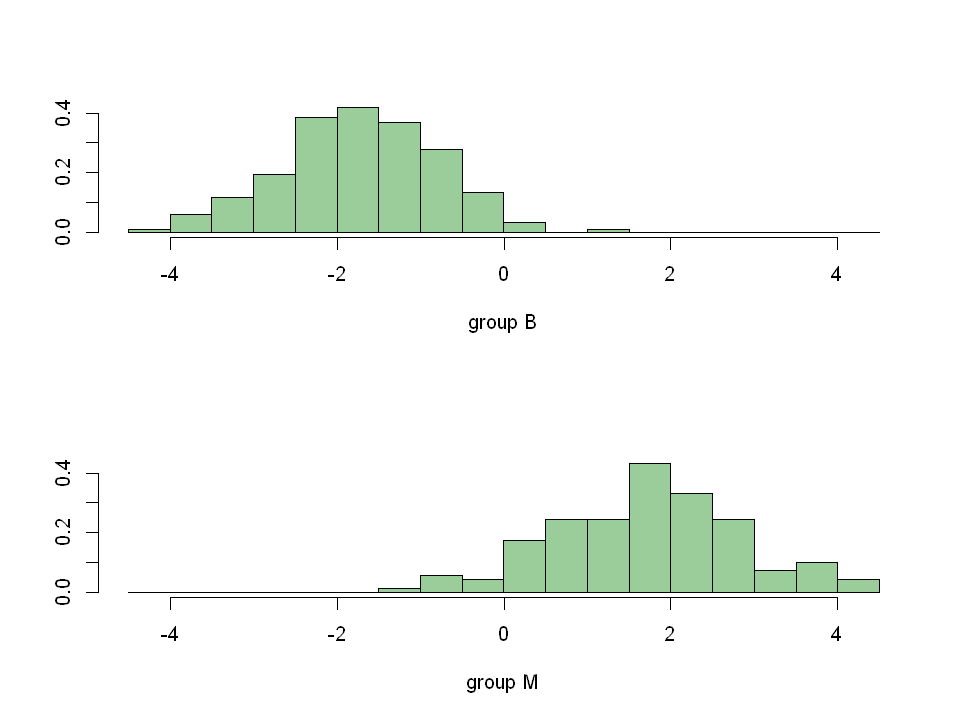

In [47]:
set.seed(123)
n <- dim(data_v5)[1]
prop <- 2/3
learning.indx <- sample(1:n,prop*n)
learning.set <- data_v5[learning.indx,]
test.set <- data_v5[-learning.indx,]
BC.lda  <- lda(Diagnosis~., data=data_v5, subset=learning.indx)
#print(BC.lda)
plot(BC.lda, col="darkseagreen3")

<div class="alert alert-block alert-info">
From the chart, we can see that there is a slight overlap between the groups.
</div>

Hitograms for the model with selected variables:

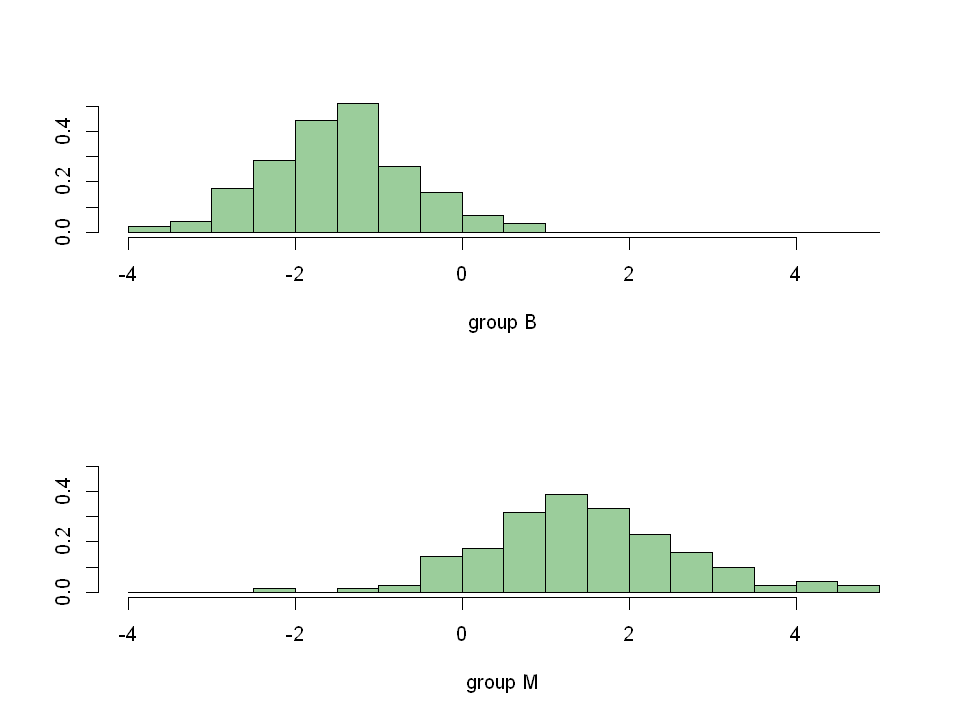

In [48]:
BC.lda5  <-lda(Diagnosis~ radius_mean+ texture_mean+ perimeter_mean +  concavity_mean  + 
               compactness_worst, data=data_v5, subset=learning.indx)
plot(BC.lda5, col="darkseagreen3")

<div class="alert alert-block alert-info">
For the model with 5 selected variables, the groups still overlap. 
</div>
We will evaluate the accuracy and error of the above models on the test set.

In [50]:
pred.lda  <-  predict(BC.lda, test.set)
pred.lda5  <-  predict(BC.lda5, test.set)

pred.lda_r  <-  predict(BC.lda, learning.set)
pred.lda5_r  <-  predict(BC.lda5, learning.set)

pred.lda.prob <- pred.lda$posterior
pred.lda5.prob <- pred.lda5$posterior

real_test <- data_v5$Diagnosis[-learning.indx]
real_learn <- data_v5$Diagnosis[learning.indx]
labels.lda <- pred.lda$class
labels.lda5 <- pred.lda5$class
labels.lda_r <- pred.lda_r$class
labels.lda5_r <- pred.lda5_r$class

# evaluation of classification accuracy: contingency matrix, classification error
real <- data_v5$Diagnosis[-learning.indx] 
(conf.mat.lda <- table(labels.lda,real)) 
conf.mat.lda_r <- table(labels.lda_r,real_learn)

(conf.mat.lda5 <- table(labels.lda5,real)) # Confusion matrix
conf.mat.lda5_r <- table(labels.lda5_r,real_learn) 

          real
labels.lda   B   M
         B 116   3
         M   2  69

           real
labels.lda5   B   M
          B 114   9
          M   4  63

Assessment of classification accuracy:

In [53]:
n.test <- dim(test.set)[1]

(error.lda <- (n.test-sum(diag(conf.mat.lda))) /n.test)
(accuracy_lda <- sum(diag(conf.mat.lda))/n.test)
(error.lda5 <- (n.test-sum(diag(conf.mat.lda5))) /n.test)
(accuracy_lda5 <- sum(diag(conf.mat.lda5))/n.test)

[1] 0.02631579

[1] 0.9736842

[1] 0.06842105

[1] 0.9315789

<div class="alert alert-block alert-info">
Model with all variables: the classification accuracy is 0.974. The classification error is 0.026.
Model with 5 selected variables: the classification accuracy is 0.932. The classification error is 0.068. Better accuracy has a model with all variables.
</div>

### 2.3 Quadratic discriminant analysis (QDA) <a class="anchor" id="2.3"></a>

As in LDA, we create two models and check their accuracy.

Assessment of classification accuracy for two models, confusion matrix, classification error:

In [56]:
BC.qda  <- qda(Diagnosis~., data=data_v5, subset=learning.indx)
BC.qda5  <-qda(Diagnosis~ radius_mean+ texture_mean+ perimeter_mean +  
               concavity_mean  + compactness_worst, data=data_v5, subset=learning.indx)
pred.qda  <-  predict(BC.qda, test.set)
pred.qda5  <-  predict(BC.qda5, test.set)

pred.qda_r  <-  predict(BC.qda, learning.set)
pred.qda5_r  <-  predict(BC.qda5, learning.set)

labels.qda <- pred.qda$class
labels.qda5 <- pred.qda5$class

labels.qda_r <- pred.qda_r$class
labels.qda5_r <- pred.qda5_r$class

(conf.mat.qda <- table(labels.qda,real))
(conf.mat.qda5 <- table(labels.qda5,real))

          real
labels.qda   B   M
         B 115   3
         M   3  69

           real
labels.qda5   B   M
          B 111   7
          M   7  65

Assessment of classification accuracy:

In [57]:
n.test <- dim(test.set)[1]

(error.qda <- (n.test-sum(diag(conf.mat.qda))) /n.test)
(accuracy_qda <- sum(diag(conf.mat.qda))/n.test)
(error.qda5 <- (n.test-sum(diag(conf.mat.qda5))) /n.test)
(accuracy_qda5 <- sum(diag(conf.mat.qda5))/n.test)

[1] 0.03157895

[1] 0.9684211

[1] 0.07368421

[1] 0.9263158

<div class="alert alert-block alert-info">
Model with all variables: the classification accuracy is 0.968. The classification error is 0.032.
Model with 5 selected variables: the classification accuracy is 0.926. The classification error is 0.074. Better accuracy has a model with all variables.
A model with all the variables is better.
</div>

### 2.4 Logistic regression <a class="anchor" id="2.4"></a>
In this part of the project, we will use logistic regression to construct a classification. It allows us to directly assess the significance of variables. We will start by constructing a model for all variables, and then reduce the variables included in the model based on their significance. We will use classical methods of optimal model selection: the AIC criterion and significance tests of variables.s

#### 2.4.1 Construction of model I for all variables <a class="anchor" id="2.4.1"></a>

In [65]:
model.logit <-  glm(Diagnosis~., data=data_v5, family=binomial(link="logit"))
summary(model.logit)
(coeff1 <- coefficients(model.logit))
(AIC <- model.logit$aic)


Call:
glm(formula = Diagnosis ~ ., family = binomial(link = "logit"), 
    data = data_v5)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1002  -0.0474  -0.0026   0.0080   3.1685  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -714.201    600.620  -1.189  0.23440    
radius_mean          -258.214    335.084  -0.771  0.44095    
texture_mean           11.892      2.623   4.534 5.78e-06 ***
perimeter_mean        562.109    585.792   0.960  0.33727    
compactness_mean      -51.303     40.162  -1.277  0.20147    
concavity_mean        -24.169     23.165  -1.043  0.29678    
radius_se              34.503      8.544   4.038 5.38e-05 ***
compactness_worst     -26.955     18.354  -1.469  0.14193    
concavity_worst        29.331     16.146   1.817  0.06928 .  
concave_points_worst  106.091     23.986   4.423 9.73e-06 ***
symmetry_worst         42.561     15.558   2.736  0.00622 ** 
---
Signif. codes:  0 '***' 0.001 '

(Intercept)          radius_mean         texture_mean 
          -714.20063           -258.21388             11.89198 
      perimeter_mean     compactness_mean       concavity_mean 
           562.10879            -51.30258            -24.16906 
           radius_se    compactness_worst      concavity_worst 
            34.50273            -26.95523             29.33145 
concave_points_worst       symmetry_worst 
           106.09120             42.56141

[1] 114.063

<div class="alert alert-block alert-info">
The AIC criterion for Model I is 114,063.
</div>

In [66]:
pred.prob <- predict(model.logit, data_v5 , type = "response")
prob2labels <- function(probs,cutoff)
{
  class <- rep("B",length(probs))
  class[probs>cutoff] <- "M"
  return(as.factor(class))
}
lr.labels <- prob2labels(probs=pred.prob,cutoff=0.5)
real.labels <- data_v5$Diagnosis

conf.matrix1 <- table(lr.labels, real.labels)
conf.matrix1 
n.test <- n
(sum <- sum(diag(conf.matrix1))/n)
(classif.error1 <- (n.test - sum(diag(conf.matrix1)))/n.test)

         real.labels
lr.labels   B   M
        B 351  10
        M   6 201

[1] 0.971831

[1] 0.02816901

<div class="alert alert-block alert-info">
The classification accuracy for Model I is 0.972. The classification error is 0.028.
</div>

Taking $\alpha = 0.05$ to determine which predictors were significant in this model, we can observe that the variables texture mean, radius se, concave points worst and symmetry worst are statistically significant predictors. In the next step, we will construct a model based on these variables.

#### 2.4.2 Construction of model II for statistically significant characteristics <a class="anchor" id="2.4.1"></a>

In [67]:
model.logit2 <-  glm(Diagnosis~ texture_mean + radius_se + concave_points_worst + 
                     symmetry_worst, data=data_v5, family=binomial(link="logit"))
summary(model.logit2)
(coeff2 <- coefficients(model.logit2))
(AIC2 <- model.logit2$aic)


Call:
glm(formula = Diagnosis ~ texture_mean + radius_se + concave_points_worst + 
    symmetry_worst, family = binomial(link = "logit"), data = data_v5)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.53868  -0.13011  -0.02236   0.04129   3.03104  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -48.168      6.888  -6.993 2.69e-12 ***
texture_mean           11.031      1.987   5.552 2.82e-08 ***
radius_se              27.133      4.689   5.787 7.18e-09 ***
concave_points_worst   84.484     10.808   7.817 5.43e-15 ***
symmetry_worst         20.475     10.537   1.943    0.052 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 749.46  on 567  degrees of freedom
Residual deviance: 150.08  on 563  degrees of freedom
AIC: 160.08

Number of Fisher Scoring iterations: 8


(Intercept)         texture_mean            radius_se 
           -48.16767             11.03145             27.13347 
concave_points_worst       symmetry_worst 
            84.48375             20.47485

[1] 160.0825

<div class="alert alert-block alert-info">
The AIC criterion for Model I is 160,0825.
</div>

In [69]:
pred.prob2 <- predict(model.logit2, data_v5 , type = "response")
prob2labels <- function(probs,cutoff)
{
  class <- rep("B",length(probs))
  class[probs>cutoff] <- "M"
  return(as.factor(class))
}
lr.labels2 <- prob2labels(probs=pred.prob2,cutoff=0.55)
real.labels2 <- data_v5$Diagnosis

(conf.matrix2 <- table(lr.labels2, real.labels2))
n.test <- n
(sum <- sum(diag(conf.matrix2))/n)
(classif.error2 <- (n.test - sum(diag(conf.matrix2)))/n.test)

          real.labels2
lr.labels2   B   M
         B 346  17
         M  11 194

[1] 0.9507042

[1] 0.04929577

<div class="alert alert-block alert-info">
The classification accuracy for Model I is 0.951. The classification error is 0.049.

Comparing the models, we can observe that model I shows better accuracy classification..
</div>

## 3. Results and conclusions <a class="anchor" id="3"></a>

A table of accuracy and classification error for the best models from the method:

In [72]:
reg_lin <- 0.963
LDA <- 0.97368
QDA <- 0.9684211
reg_log <- 0.972

results_1 <- matrix(c(reg_lin, 0.037, LDA, 0.0263158, QDA, 0.0315789, reg_log, 0.028), ncol=4)
colnames(results_1) <- c("linear regression", "LDA", "QDA" ,"logistic regression")
rownames(results_1) <- c("classification accuracy", "classification error")
results_1

,linear regression,LDA,QDA,logistic regression
classification accuracy,0.963,0.9736800,0.9684211,0.972
classification error,0.037,0.0263158,0.0315789,0.028


* We can observe that the best classification ability was demonstrated by the model based on linear discriminant analysis (LDA) and logistic regression, both of which included all variables. 
* Most of the contracted models had high classification accuracy.
* The methods used allowed the evaluation and selection of an appropriate classification method to effectively distinguish between malignant and benign tumor cells.
* The analysis shows that there are less significant variables in the dataset that did not have high discriminatory abilities. Therefore, it can be considered whether it is important to include them in the input data.

## 4. Cluster analysis - clustering methods <a class="anchor" id="4"></a>
In this part of the project, a cluster analysis will be conducted to group the objects due to the similarity present. The analysis will be conducted for data from the first part of the project containing 10 explanatory variables and after removing the class labels: radius mean, texture mean, perimeter mean, compactness mean, concavity mean, radius se, compactness worst, concavity worst, concave points worst, symmetry worst.

### 4.1 K-means method <a class="anchor" id="4.1"></a>
The K-means method involves dividing the data set into K clusters, where K is a fixed number. The process is based on minimizing the mean square error (SSE) between objects and cluster centroids.

Warning message:
"ggrepel: 535 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


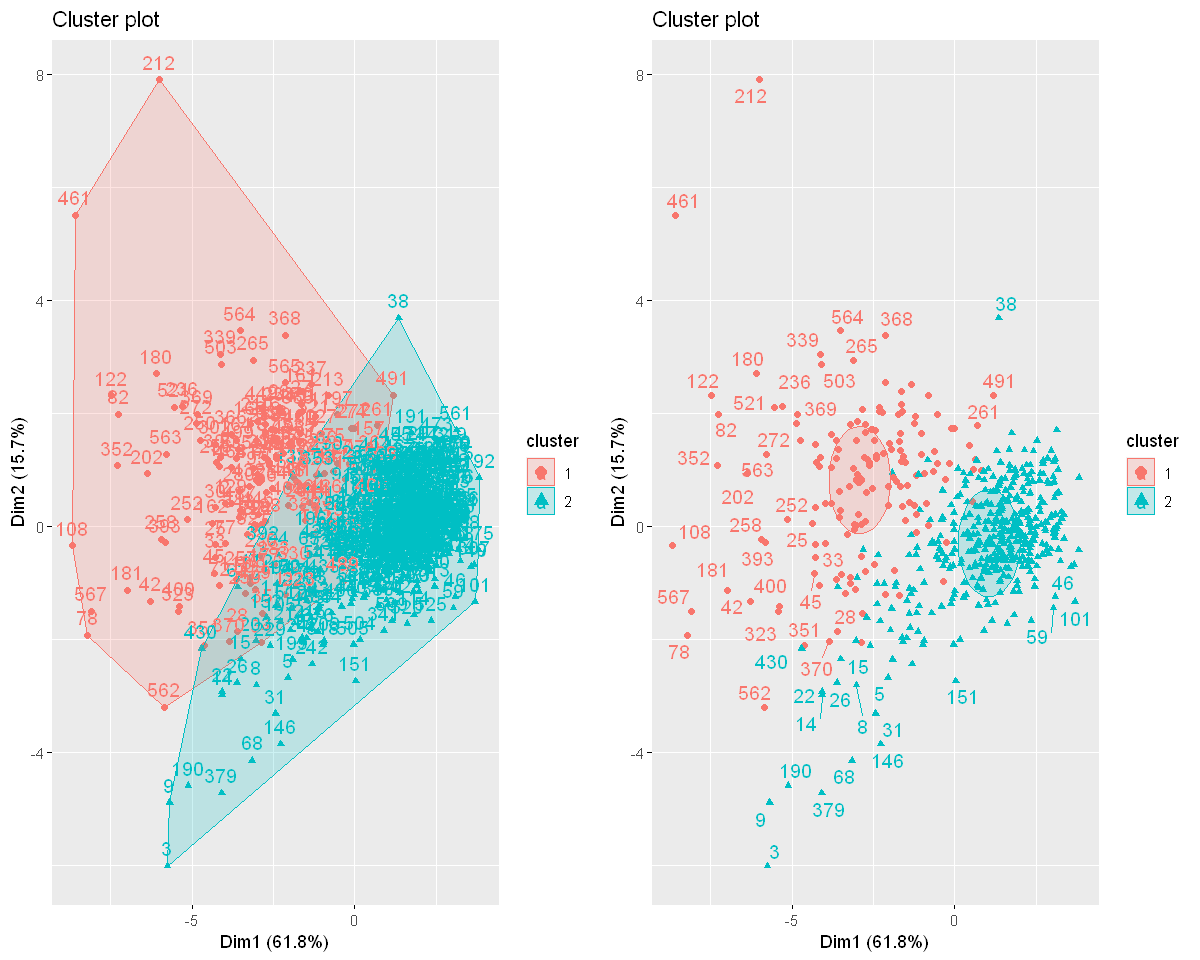

In [144]:
#We remove class labels - Diagnosis variable
library(factoextra)
data_v6 <- data_v4[,-1]
real.labels <- data_v4[,1]
k <- 2
kmeans.k2 <- kmeans(data_v6,centers=k,iter.max=10, nstart=10)

labels.kmeans <- kmeans.k2$cluster

p1 <- fviz_cluster(kmeans.k2, data_v6)

p2 <- fviz_cluster(kmeans.k2, data_v6, ellipse.type="euclid", repel = TRUE)
grid.arrange(p1,p2, ncol = 2, nrow = 1)
options(repr.plot.width = 10, repr.plot.height = 8)

In [106]:
library(e1071)
labels.kmeans <- kmeans.k2$cluster
tab.kmeans <- table(labels.kmeans, real.labels)
tab_1 <- data.frame(matrix(tab.kmeans,ncol=2))
row.names(tab_1) <- c("1","2")
colnames(tab_1) <- c("B","M")
tab_1 
(m1 <- compareMatchedClasses(labels.kmeans, real.labels, method="exact")$diag)

,B,M
,<int>,<int>
1,6,146
2,351,65


0.875


<div class="alert alert-block alert-info">
The partition compatibility measure for the K-means method is 87.5%.
</div>

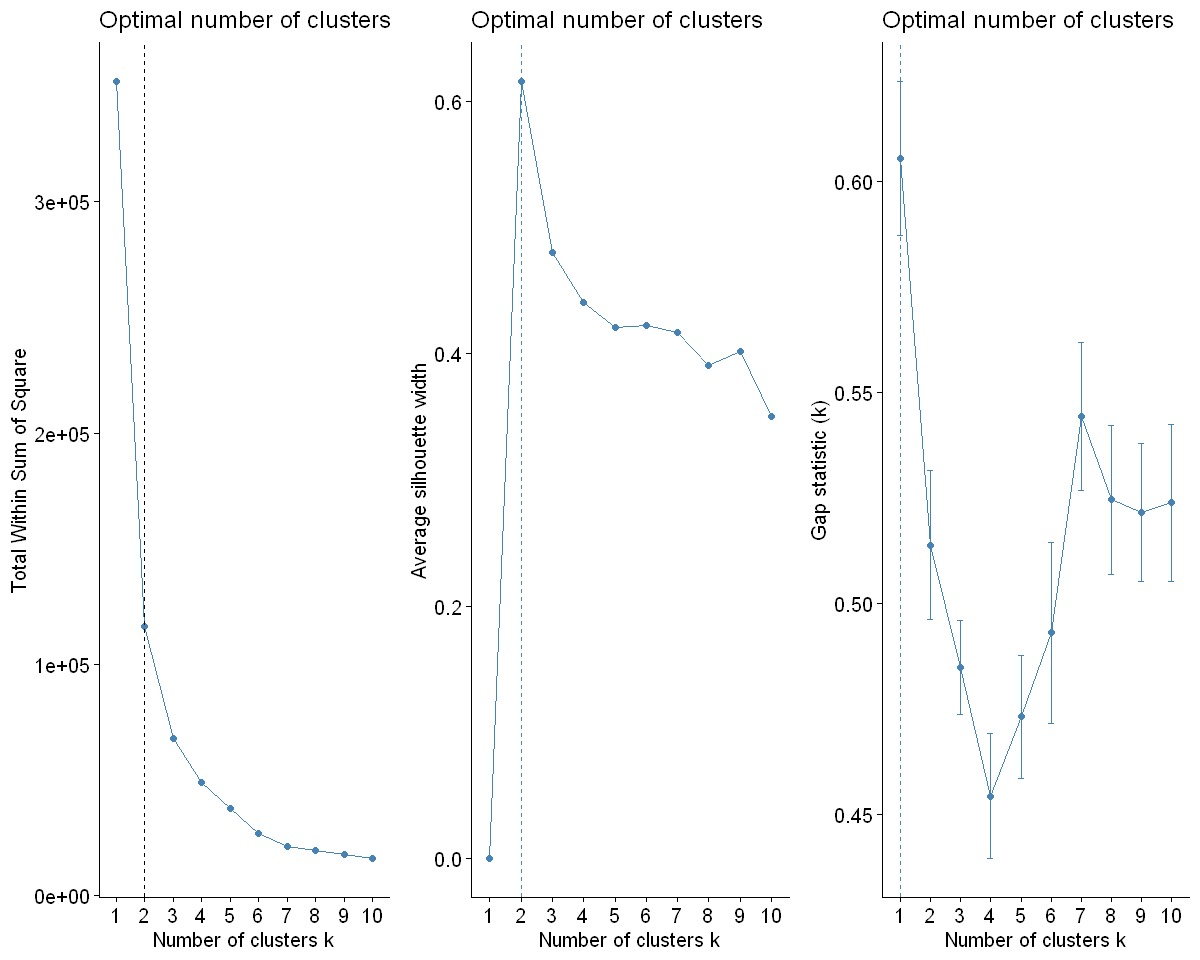

In [143]:
p3 <- fviz_nbclust(data_v6, FUNcluster = kmeans, method="wss", k.max=10) + 
geom_vline(xintercept=2, linetype=2)
p4 <- fviz_nbclust(data_v6, FUNcluster = kmeans, method = "silhouette")
p5 <- fviz_nbclust(data_v6, FUNcluster = kmeans, method = "gap")
grid.arrange(p3,p4,p5, ncol = 3, nrow = 1)
options(repr.plot.width = 10, repr.plot.height = 8)

<div class="alert alert-block alert-info">
We can observe that the optimal number of clusters is K=2.
</div>

### 4.2 PAM algorithm (Partitioning Around Medoids) <a class="anchor" id="4.2"></a>
The Partitioning Around Medoids (PAM) algorithm is one of the methods used in cluster analysis to group a dataset. Like K-means, the goal of the PAM algorithm is to divide a dataset into K clusters. However, unlike K averages, which use centroids, PAM uses medoids to represent clusters.

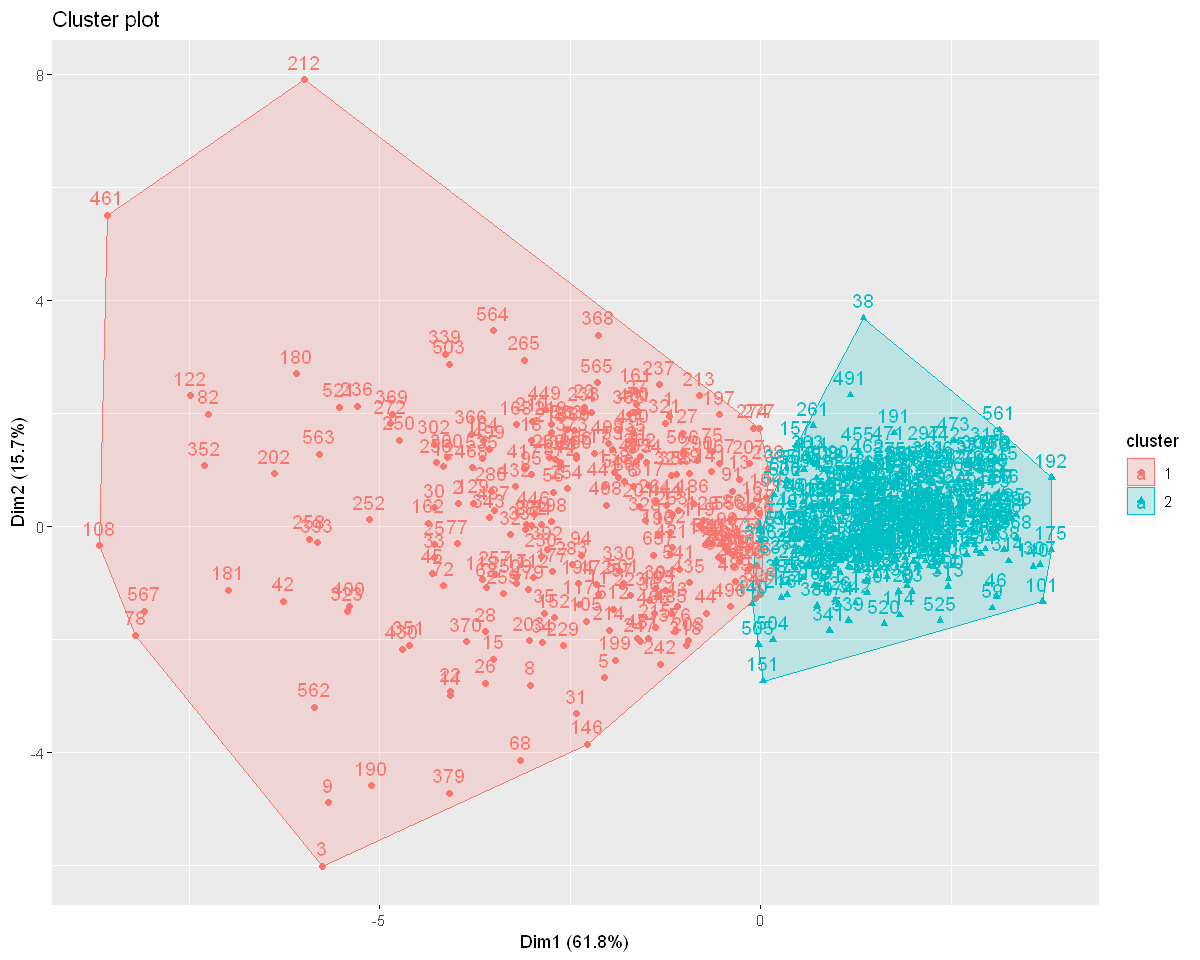

In [142]:
library(cluster)
pam.diss <- daisy(data_v6)
pam.diss.matrix <- as.matrix(pam.diss)
pam2 <- pam(x=pam.diss, diss=TRUE, k=2)

labels.pam2 <- pam2$clustering

data.numeric <- data_v6[,names(unlist(lapply(data_v6,FUN=function(x) if(is.numeric(x)) "numeric" else NULL)))]
data.numeric <- na.omit(data.numeric)
data.numeric.pam <- pam(data.numeric, k=2, metric="euclidean", stand=TRUE)

fviz_cluster(data.numeric.pam)
options(repr.plot.width = 10, repr.plot.height = 8)

In [109]:
labels.pam2 <- pam2$clustering
tab.pam <- table(labels.pam2, real.labels)

tab_2 <- data.frame(matrix(tab.pam,ncol=2))
row.names(tab_2) <- c("1","2")
colnames(tab_2) <- c("B","M")
tab_2 

(m2 <- compareMatchedClasses(labels.pam2, real.labels, method="exact")$diag)

,B,M
,<int>,<int>
1,8,155
2,349,56


0.8873239


<div class="alert alert-block alert-info">
The partition compatibility measure for the PAM method is 88.7%.
</div>

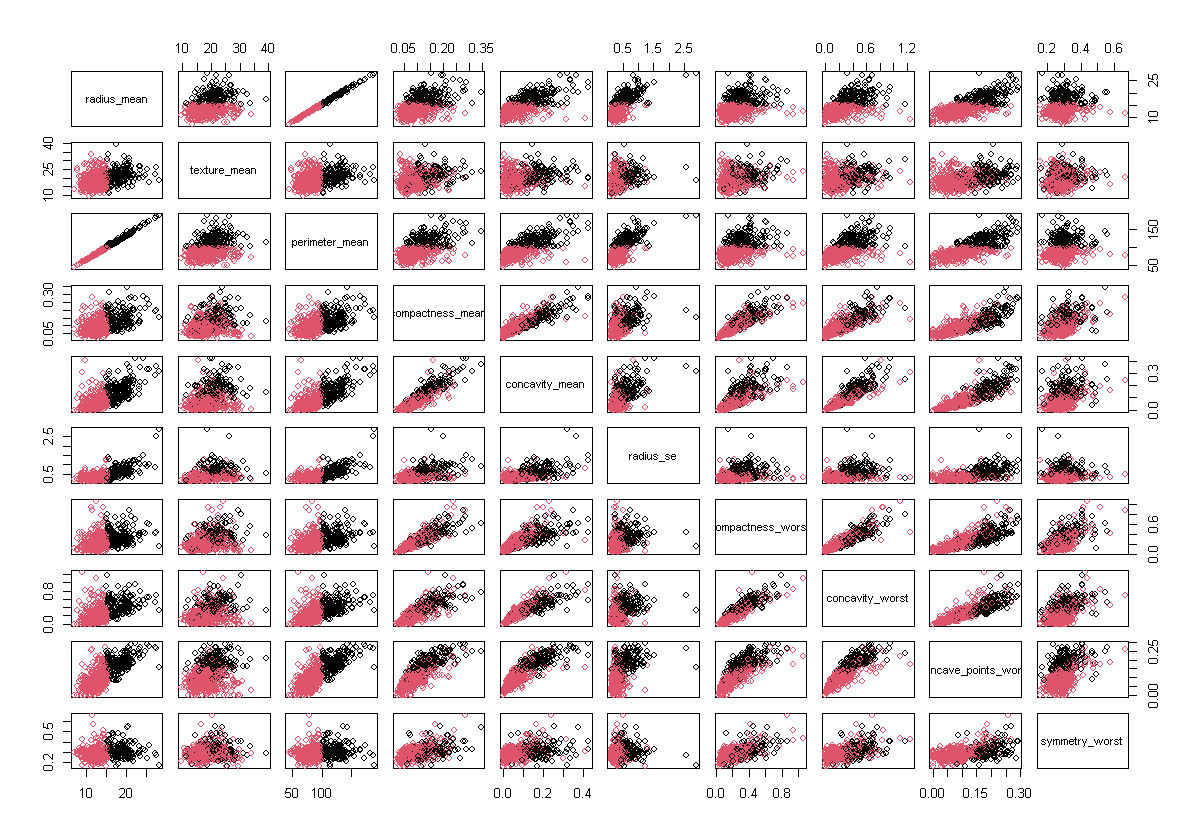

In [110]:
plot(data_v6,col=labels.pam2)

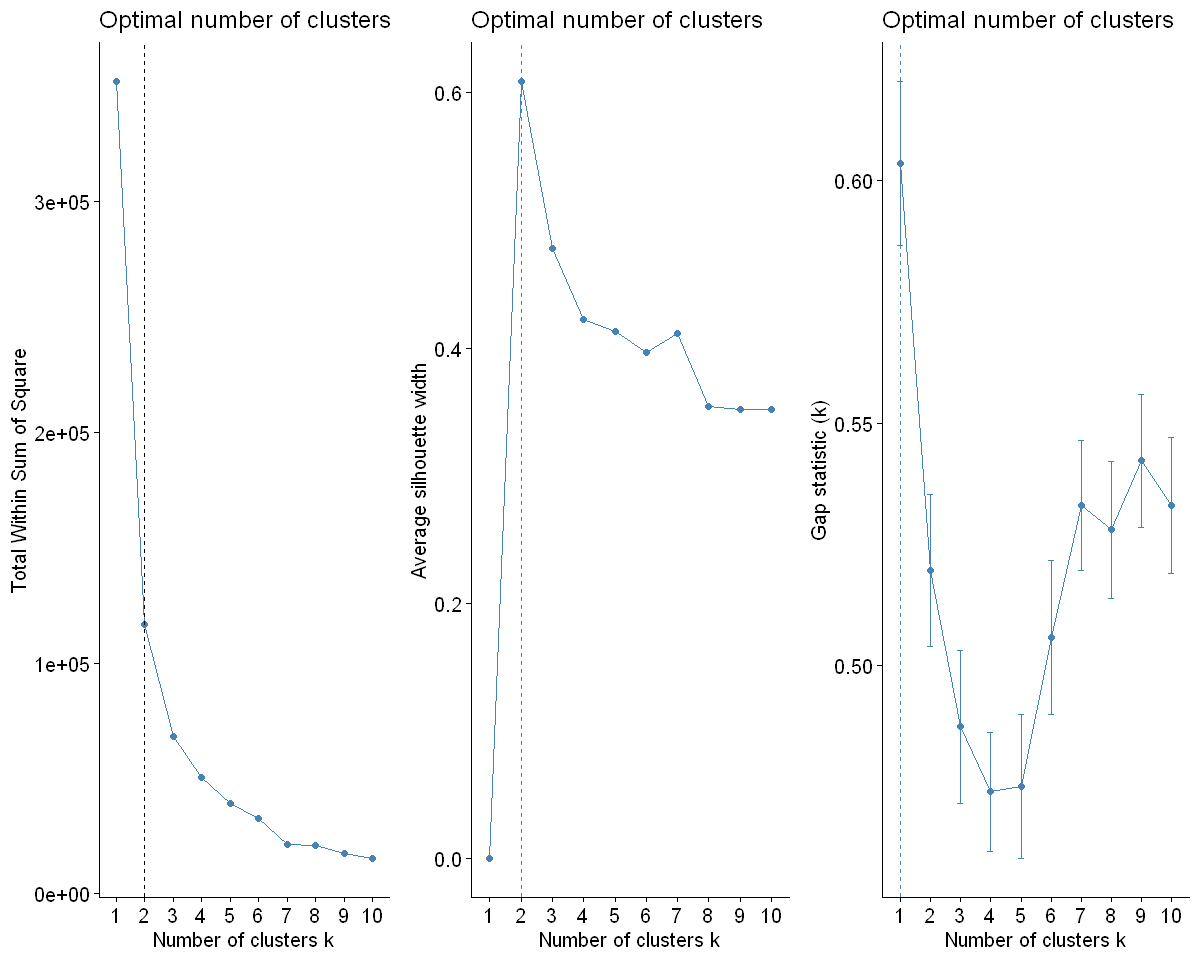

In [141]:
p6 <- fviz_nbclust(data_v6, FUNcluster = cluster::pam, method="wss", k.max=10) + 
geom_vline(xintercept=2, linetype=2)
p7 <- fviz_nbclust(data_v6, FUNcluster = cluster::pam, method = "silhouette") # PAM
p8 <- fviz_nbclust(data_v6, FUNcluster = cluster::pam, method = "gap")
grid.arrange(p6,p7,p8, ncol = 3, nrow = 1)
options(repr.plot.width = 10, repr.plot.height = 8)

<div class="alert alert-block alert-info">
We can observe that the optimal number of clusters is K=2.
</div>

### 4.3 CLARA method <a class="anchor" id="4.3"></a>
The CLARA (Clustering Large Applications) method is one of the techniques used in cluster analysis to group large data sets. CLARA is an extension of the Partitioning Around Medoids (PAM) algorithm and was developed to deal with computational limitations and efficient clustering of large data sets.

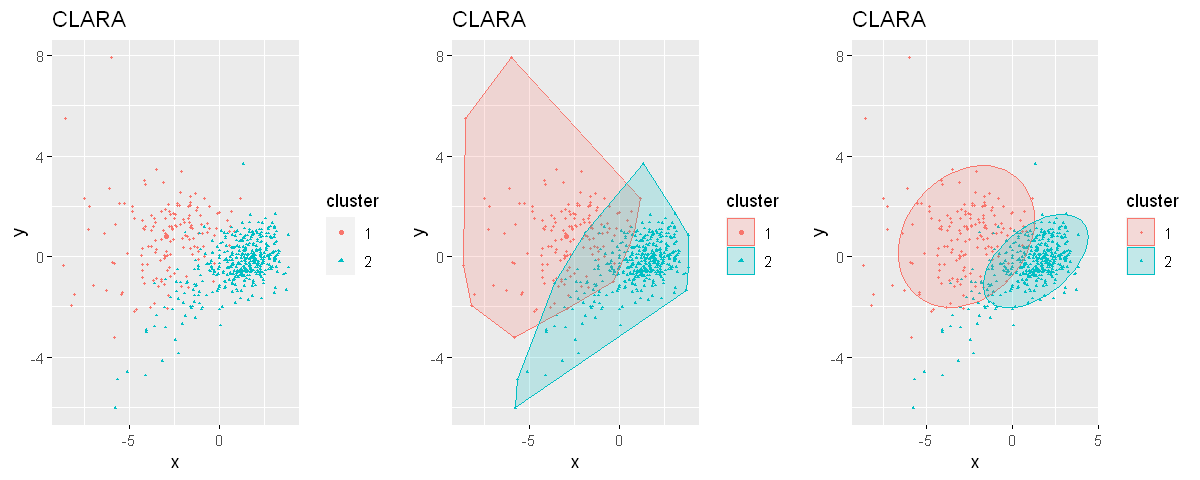

In [140]:
part.CLARA <- clara(data_v6, k=2, samples=10, sampsize=100)
p9 <- fviz_cluster(part.CLARA, main = "CLARA", ellipse = FALSE, geom = "point", xlab="x", ylab="y", show.clust.cent = TRUE, pointsize = .5)
p10 <- fviz_cluster(part.CLARA, main = "CLARA", ellipse = TRUE, geom = "point", xlab="x", ylab="y", show.clust.cent = TRUE, pointsize = .5)
p11 <- fviz_cluster(part.CLARA, main = "CLARA", ellipse = TRUE, ellipse.type = "t", geom = "point",xlab="x", ylab="y", pointsize = .5)
grid.arrange(p9,p10,p11, ncol = 3, nrow = 1)
options(repr.plot.width = 10, repr.plot.height = 8)

In [134]:
labels.clara <- part.CLARA$clustering
tab.clara <- table(labels.clara, real.labels)

tab_3 <- data.frame(matrix(tab.clara,ncol=2))
row.names(tab_3) <- c("1","2")
colnames(tab_3) <- c("B","M")
tab_3

(m3 <-compareMatchedClasses(labels.clara, real.labels, method="exact")$diag)

,B,M
,<int>,<int>
1,6,148
2,351,63


0.8785211


<div class="alert alert-block alert-info">
The partition compatibility measure for the CLARA method is 87.9%.
</div>

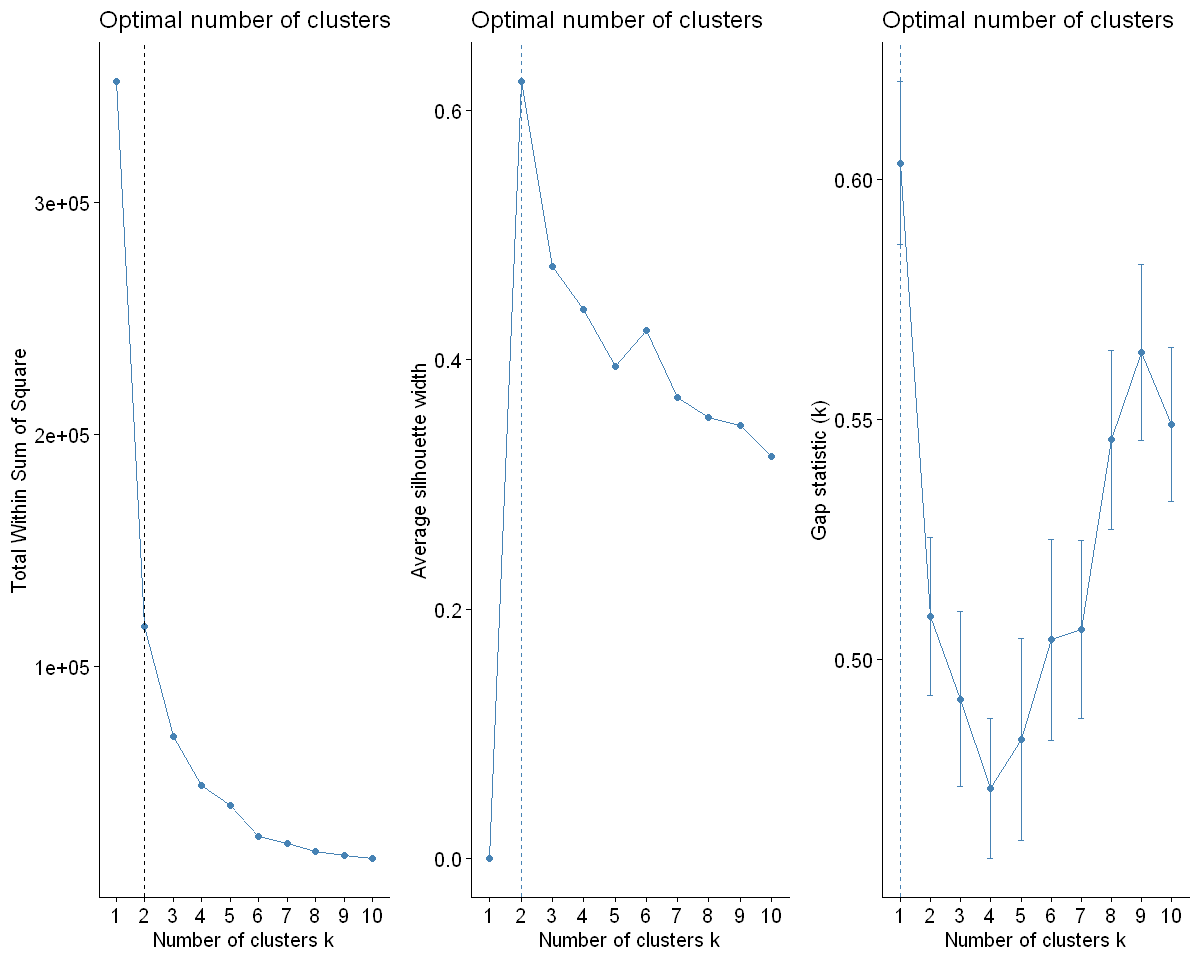

In [145]:
p12 <- fviz_nbclust(data_v6, FUNcluster = cluster::clara, method="wss", k.max=10) + geom_vline(xintercept=2, linetype=2)
p13 <- fviz_nbclust(data_v6, FUNcluster = cluster::clara, method = "silhouette") # hierarchical clustering
p14 <- fviz_nbclust(data_v6, FUNcluster = cluster::clara, method = "gap")
grid.arrange(p12,p13,p14, ncol = 3, nrow = 1)
options(repr.plot.width = 10, repr.plot.height = 8)

<div class="alert alert-block alert-info">
We can observe that the optimal number of clusters is K=2.
</div>

## 5. Assessing the quality of clustering algorithms <a class="anchor" id="5"></a>
* Silhouette charts for the considered clustering methods:

  cluster size ave.sil.width
1       1  152          0.53
2       2  416          0.65


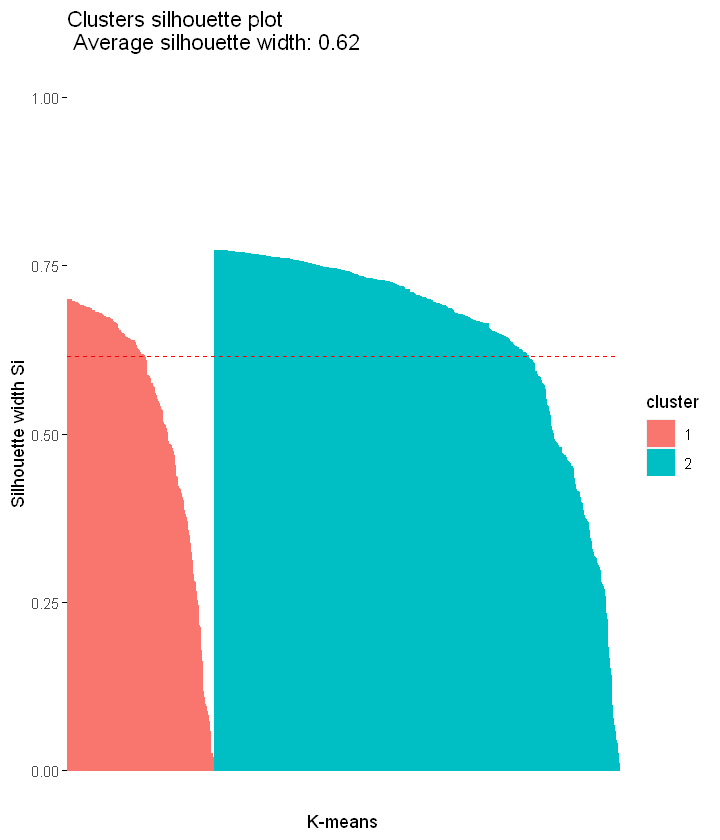

In [123]:
sil.kmeans <- silhouette(kmeans.k2$cluster, dist(data_v6))
fviz_silhouette(sil.kmeans, xlab="K-means")
options(repr.plot.width = 6, repr.plot.height = 8)

  cluster size ave.sil.width
1       1  163          0.50
2       2  405          0.65


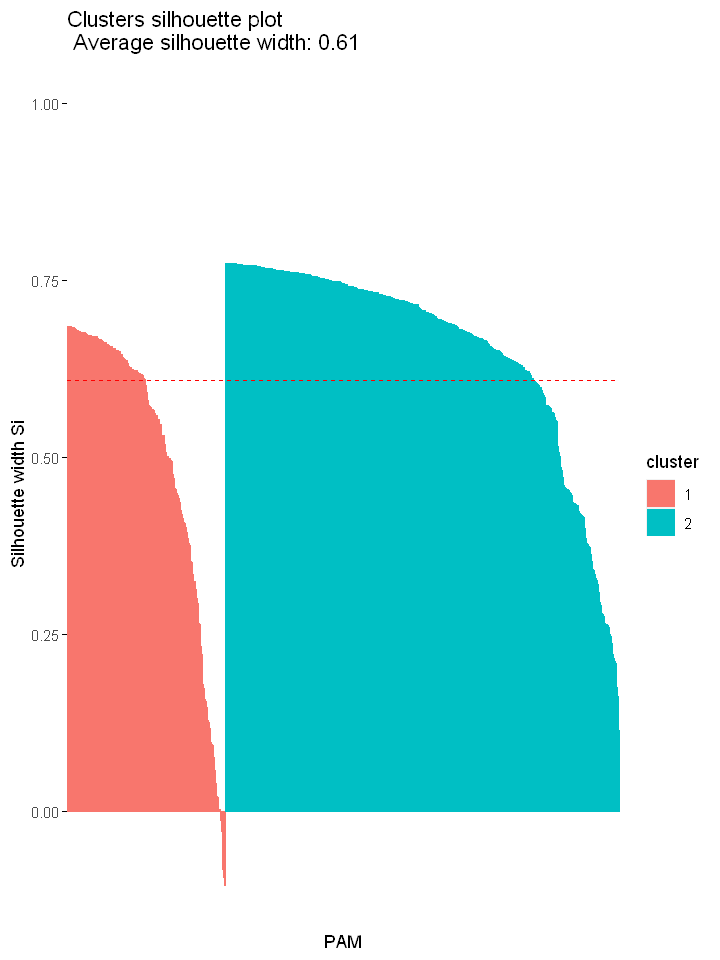

In [124]:
sil.pam <- silhouette(pam2$clustering, dist(data_v6))
fviz_silhouette(sil.pam, xlab="PAM")
options(repr.plot.width = 6, repr.plot.height = 8)

  cluster size ave.sil.width
1       1  154          0.52
2       2  414          0.65


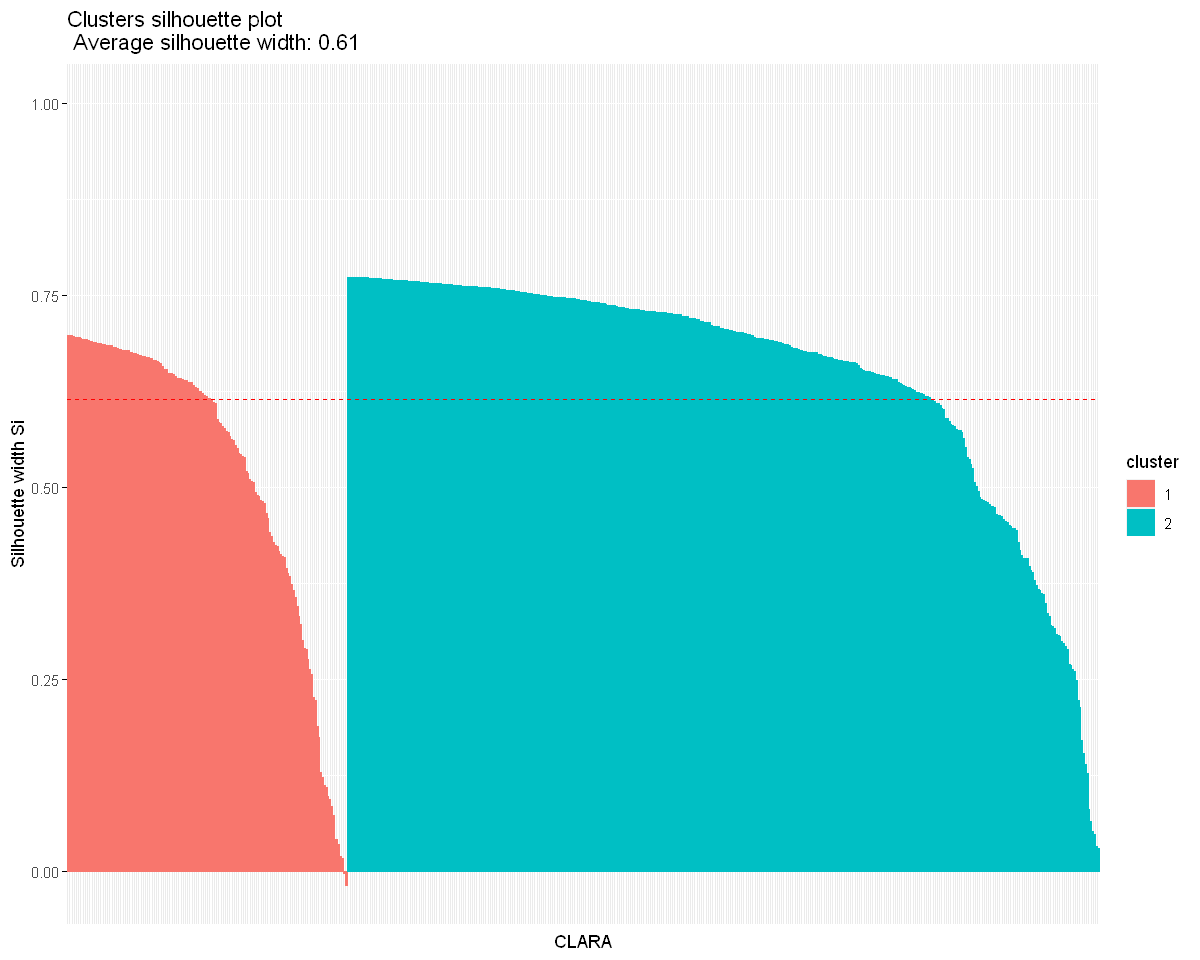

In [146]:
sil.clara <- silhouette(part.CLARA$cluster, dist(data_v6))
fviz_silhouette(sil.clara, xlab="CLARA")
options(repr.plot.width = 6, repr.plot.height = 8)

* Internal indicators (silhouette, Dunn, connectivity):

Warning message in clValid(data_v6, nClust = K.range, clMethods = methods, validation = "internal"):
"rownames for data not specified, using 1:nrow(data)"



Clustering Methods:
 kmeans pam clara 

Cluster sizes:
 2 3 4 5 6 

Validation Measures:
                           2       3       4       5       6
                                                            
kmeans Connectivity  19.1242 37.0492 40.2829 53.9798 73.2925
       Dunn           0.0065  0.0106  0.0131  0.0165  0.0073
       Silhouette     0.6157  0.4836  0.4654  0.4436  0.4317
pam    Connectivity  10.9560 28.7099 65.3325 74.0694 66.4651
       Dunn           0.0103  0.0070  0.0106  0.0032  0.0086
       Silhouette     0.6087  0.4781  0.4221  0.4129  0.3967
clara  Connectivity  11.7349 26.8813 33.7980 77.2175 81.3238
       Dunn           0.0102  0.0066  0.0079  0.0059  0.0145
       Silhouette     0.6230  0.4751  0.4404  0.3949  0.4232

Optimal Scores:

             Score   Method Clusters
Connectivity 10.9560 pam    2       
Dunn          0.0165 kmeans 5       
Silhouette    0.6230 clara  2       



,Score,Method,Clusters
,<dbl>,<chr>,<chr>
Connectivity,10.95595238,pam,2
Dunn,0.01648105,kmeans,5
Silhouette,0.62300388,clara,2


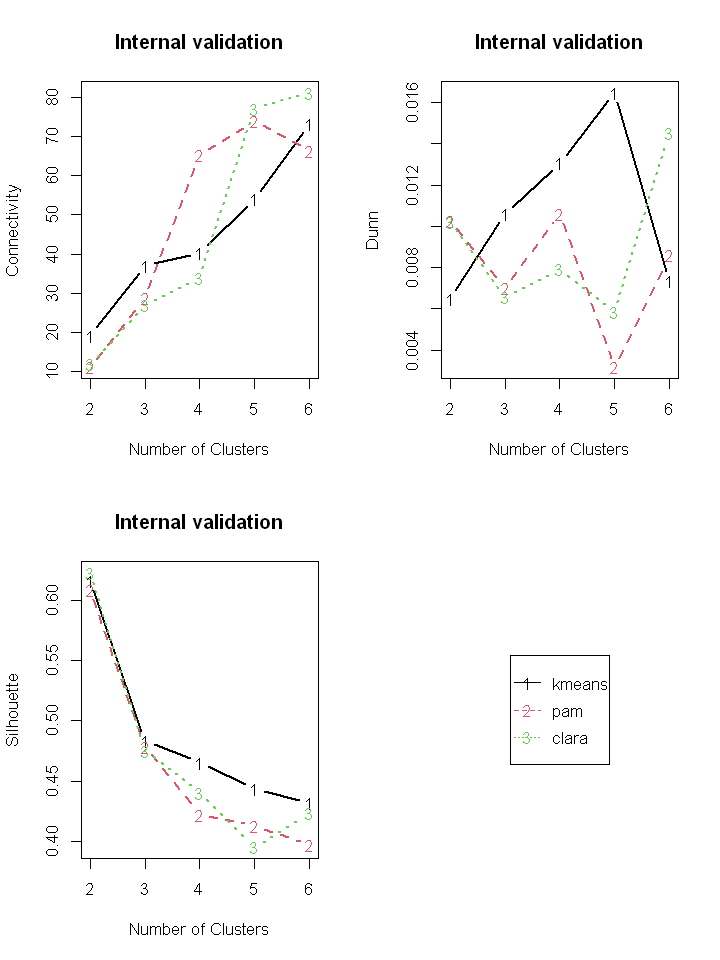

In [127]:
library(clValid)
methods <- c("kmeans","pam", "clara")
K.range <- 2:6
internal.validation <- clValid(data_v6, nClust=K.range, clMethods=methods,
                               validation="internal")
summary(internal.validation)
optimalScores(internal.validation)
par(mfrow = c(2, 2))
plot(internal.validation, legend = FALSE, lwd=2)
plot.new()
legend("center", clusterMethods(internal.validation), col=1:9, lty=1:9, pch=paste(1:9))

<div class="alert alert-block alert-info">
We can observe that for all methods, the value of the Silhouette index is highest for the number of clusters K=2. The higher the number of clusters, the index has a lower value for each method. For K=3 we already get worse results.
</div>

* Stability indicators (APN, AD, ADM):

Warning message in clValid(data_v6, nClust = K.range, clMethods = methods, validation = "stability"):
"rownames for data not specified, using 1:nrow(data)"



Clustering Methods:
 kmeans pam clara 

Cluster sizes:
 2 3 4 5 6 

Validation Measures:
                  2       3       4       5       6
                                                   
kmeans APN   0.0337  0.0467  0.0569  0.0947  0.0683
       AD   17.1946 13.1688 11.8142 10.4232  9.0240
       ADM   1.2125  1.3716  1.2988  1.8813  1.1704
       FOM   2.6333  2.0488  2.1193  1.9504  1.7968
pam    APN   0.0342  0.0488  0.0560  0.0929  0.0836
       AD   17.1254 12.9623 11.1332 10.0580  9.0335
       ADM   1.2640  1.2177  1.1398  1.6940  1.5647
       FOM   2.6200  2.0236  2.0372  1.9222  1.8184
clara  APN   0.0320  0.0427  0.0864  0.0739  0.0826
       AD   17.2309 12.9182 11.4014 10.1012  9.2653
       ADM   1.3487  1.0696  1.8724  1.3574  1.5177
       FOM   2.4094  2.0084  2.0220  2.0126  1.9140

Optimal Scores:

    Score  Method Clusters
APN 0.0320 clara  2       
AD  9.0240 kmeans 6       
ADM 1.0696 clara  3       
FOM 1.7968 kmeans 6       



,Score,Method,Clusters
,<dbl>,<chr>,<chr>
APN,0.03198154,clara,2
AD,9.02400612,kmeans,6
ADM,1.06961927,clara,3
FOM,1.79681419,kmeans,6


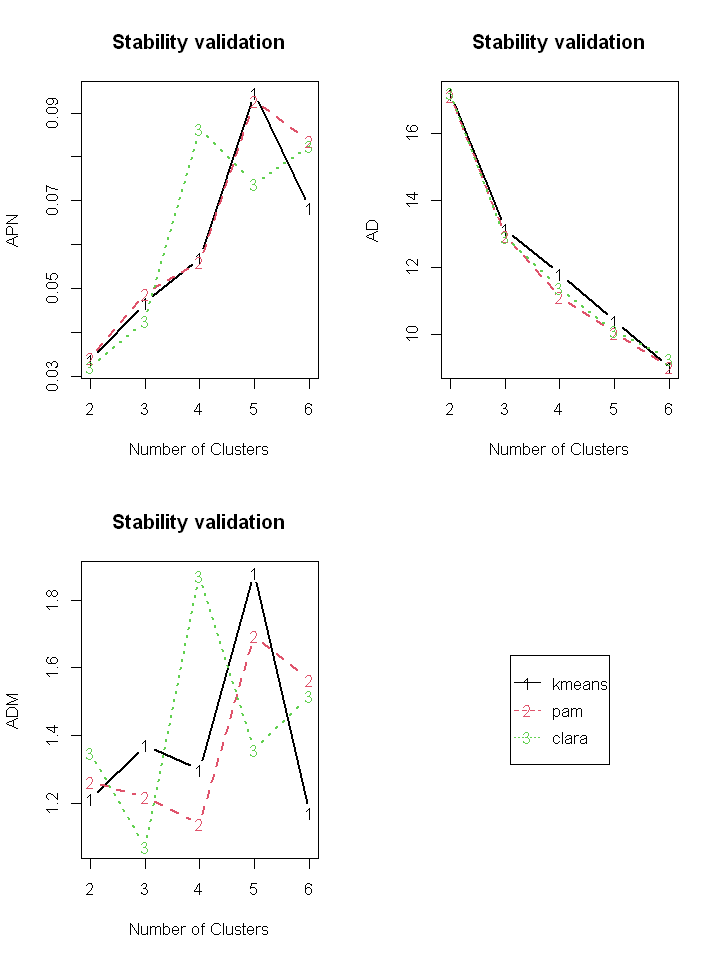

In [128]:
stability.validation <- clValid(data_v6, nClust=K.range, clMethods=methods,
                                validation="stability")
summary(stability.validation)
optimalScores(stability.validation)

par(mfrow = c(2,2))
plot(stability.validation, measure=c("APN","AD","ADM"), legend=FALSE, lwd=2)
plot.new()
legend("center", clusterMethods(stability.validation), col=1:9, lty=1:9, pch=paste(1:9))
par(mfrow = c(1,1))

<div class="alert alert-block alert-info">
The value of the APN indicator for K=2 is the lowest for the CLARA method (the closer the value to 0 the better). However, for each method, the value is less than 0.04 for K=2. The higher the number of clusters, the higher the index value for each method. 

The smaller the value of the AD indicator the better. We can observe that for K=2 the methods K-means, PAM, CLARA have a very similar value.

Also for the ADM index, the smaller the value the better. For K=2 the methods K-means, PAM, CLARA have a very similar value. 
</div>